In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import ExtraTreesRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
model = ExtraTreesRegressor(random_state=1)

# Loading Data

In [3]:
study = pd.read_csv('../brassica.csv')
# Selecting columns with labels and expression elements counts
study = study[['cross', 'reference', 'chr', 'start', 'end','srec', 'gene', 'mRNA', 'exon', 'CDS']]

In [4]:
study

cross reference   chr     start       end      srec  \
0       broccoli_cauliflower  broccoli  chr1         0    100000  0.000000   
1       broccoli_cauliflower  broccoli  chr1    100000    200000  0.000000   
2       broccoli_cauliflower  broccoli  chr1    200000    300000  0.000000   
3       broccoli_cauliflower  broccoli  chr1    300000    400000  0.036497   
4       broccoli_cauliflower  broccoli  chr1    400000    500000  0.032847   
...                      ...       ...   ...       ...       ...       ...   
103831        white_kohlrabi  kohlrabi  chr9  64400000  64500000  0.189701   
103832        white_kohlrabi  kohlrabi  chr9  64500000  64600000  0.170731   
103833        white_kohlrabi  kohlrabi  chr9  64600000  64700000  0.153658   
103834        white_kohlrabi  kohlrabi  chr9  64700000  64800000  0.138292   
103835        white_kohlrabi  kohlrabi  chr9  64800000  64900000  0.124463   

        gene  mRNA  exon  CDS  
0         22    22    91   91  
1         27    27   135  135  
2         15    15    66   66  
3         26    26    87   87  
4         22    22    90   90  
...      ...   ...   ...  ...  
103831    13    13    76   76  
103832    16    16    77   77  
103833    22    22   112  112  
103834    11    11    49   49  
103835    16    16    77   77  

[103836 rows x 10 columns]

In [5]:
kale_white = study[study['cross'] == 'kale_white']

In [6]:
kale_white

cross reference   chr     start       end      srec  gene  mRNA  \
62221  kale_white      kale  chr1         0    100000  0.000000    15    15   
62222  kale_white      kale  chr1    100000    200000  0.000000    26    26   
62223  kale_white      kale  chr1    200000    300000  0.017857    21    21   
62224  kale_white      kale  chr1    300000    400000  0.033929    26    26   
62225  kale_white      kale  chr1    400000    500000  0.066379    23    23   
...           ...       ...   ...       ...       ...       ...   ...   ...   
72661  kale_white     white  chr9  65200000  65300000  0.300418     5     5   
72662  kale_white     white  chr9  65300000  65400000  0.288233    18    18   
72663  kale_white     white  chr9  65400000  65500000  0.259410    19    19   
72664  kale_white     white  chr9  65500000  65600000  0.233469    18    18   
72665  kale_white     white  chr9  65600000  65700000  0.210122     8     8   

       exon  CDS  
62221    71   71  
62222   111  111  
62223    86   86  
62224    83   83  
62225    99   99  
...     ...  ...  
72661    17   17  
72662    91   91  
72663   106  106  
72664    82   82  
72665    37   37  

[10445 rows x 10 columns]

In [7]:
k = kale_white[kale_white['reference']=='kale']

In [8]:
w = kale_white[kale_white['reference']=='white']

# KALE GENOME

# Data exploration

In [9]:
df = k

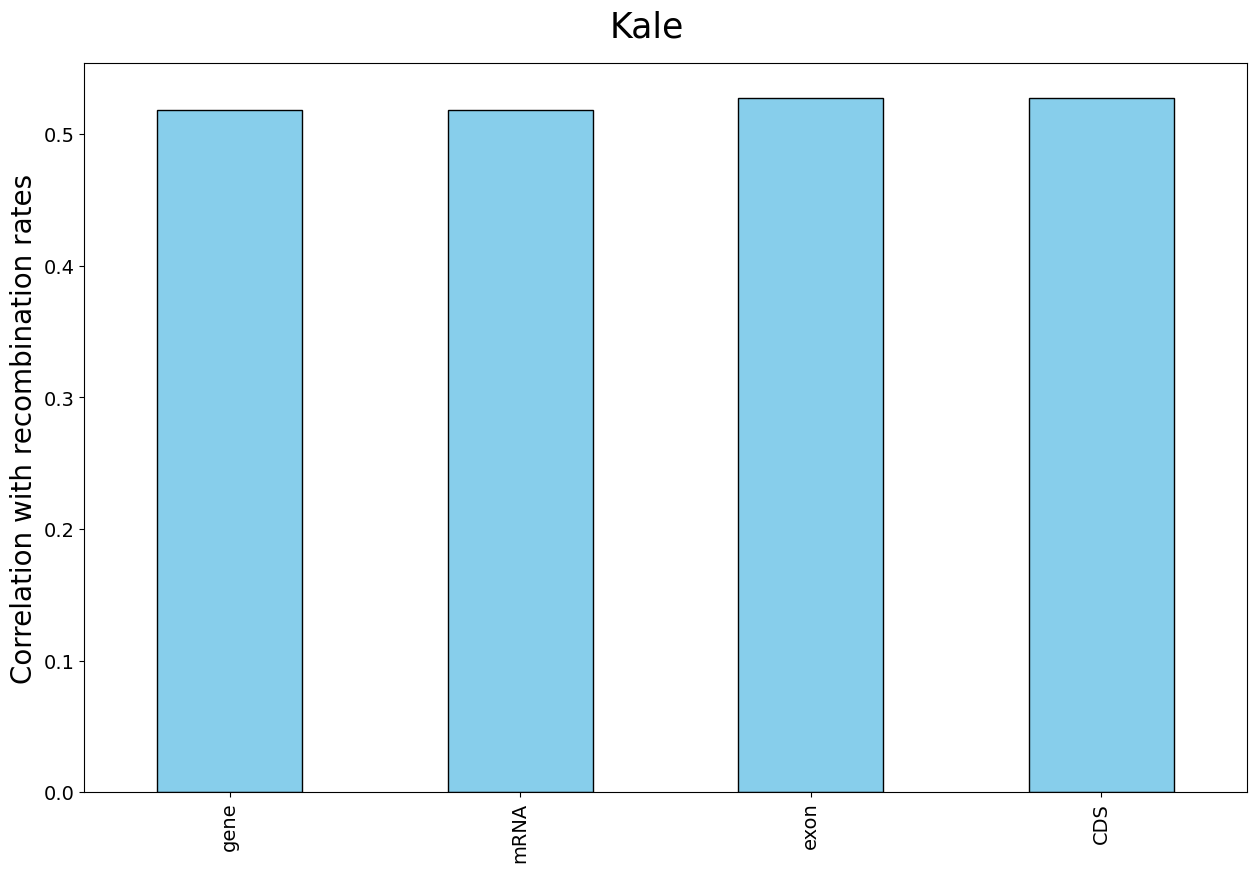

In [10]:
df_stats = df.drop(['cross', 'reference','chr','start','end'],  axis=1)
df_stats_corr = df_stats.corr()['srec'].sort_values(ascending = True)
df_corr = df_stats.corr()
df_corr = df_corr.iloc[1:, :]
fig = plt.figure(figsize=(15,9))
ax = fig.add_subplot(111)
df_corr['srec'].sort_values(ascending = True).plot(kind = 'bar', color='skyblue', edgecolor='black')
ax.set_ylabel('Correlation with recombination rates', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=14)
plt.suptitle('Kale', fontsize=25)
plt.subplots_adjust(top=0.92)

plt.show()

# Chromosome Split

In [11]:
chr1 = df[df['chr']== 'chr1']
chr2 = df[df['chr']== 'chr2']
chr3 = df[df['chr']== 'chr3']
chr4 = df[df['chr']== 'chr4']
chr5 = df[df['chr']== 'chr5']
chr6 = df[df['chr']== 'chr6']
chr7 = df[df['chr']== 'chr7']
chr8 = df[df['chr']== 'chr8']
chr9 = df[df['chr']== 'chr9']

In [12]:
achr1 = df[df['chr']!= 'chr1']
achr2 = df[df['chr']!= 'chr2']
achr3 = df[df['chr']!= 'chr3']
achr4 = df[df['chr']!= 'chr4']
achr5 = df[df['chr']!= 'chr5']
achr6 = df[df['chr']!= 'chr6']
achr7 = df[df['chr']!= 'chr7']
achr8 = df[df['chr']!= 'chr8']
achr9 = df[df['chr']!= 'chr9']

# Function to train models and make graphs

The model is trained with the information of all chromosomes except the information of the chromosome to be predicted.

In [13]:
def plot_chromosome_results(chr_number):
    # Replace  with 'chr{chr_number}' 
    chromosomes_data = globals()[f'achr{chr_number}']
    chr_data = globals()[f'chr{chr_number}']

    # TRAINING MODEL
    X_train = chromosomes_data.drop(['cross', 'reference','chr','start','end','srec'], axis=1)
    y_train = chromosomes_data[['srec']]

    model.fit(X_train, y_train)
    model_preds = model.predict(chr_data.drop(['cross', 'reference','chr','start','end','srec'], axis=1))
    
    #SMOOTHING
    model_spreds= np.zeros(len(model_preds))

    for i in  range(1, len(model_preds)): 
        model_spreds[i] = model_preds[i-1]*0.1 + model_spreds[i-1]*0.9
        
    #CORRELATIONS BY QUARTILES
    c_q1 = int(len(chr_data)*0.25)
    c_q2 = int(len(chr_data)*0.50)
    c_q3 = int(len(chr_data)*0.75)
    
    rq1 = chr_data['srec'].iloc[0:c_q1]
    rq2 = chr_data['srec'].iloc[c_q1:c_q2]
    rq3 = chr_data['srec'].iloc[c_q2:c_q3]
    rq4 = chr_data['srec'].iloc[c_q3:int(len(chr_data))]

    pq1 = model_spreds[0:c_q1]
    pq2 = model_spreds[c_q1:c_q2]
    pq3 = model_spreds[c_q2:c_q3]
    pq4 = model_spreds[c_q3:int(len(chr_data))]

    corr_q1 = np.corrcoef(rq1, pq1)[0, 1]
    corr_q2 = np.corrcoef(rq2, pq2)[0, 1]
    corr_q3 = np.corrcoef(rq3, pq3)[0, 1]
    corr_q4 = np.corrcoef(rq4, pq4)[0, 1]
    
    globals()[f'corr_q1_chr{chr_number}'] = corr_q1
    globals()[f'corr_q2_chr{chr_number}'] = corr_q2
    globals()[f'corr_q3_chr{chr_number}'] = corr_q3
    globals()[f'corr_q4_chr{chr_number}'] = corr_q4
     
    # PLOTTING RESULTS
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4), gridspec_kw={'width_ratios': [10, 3]})

    # Line plot and correlation plot
    ax1.plot(chr_data.end, chr_data.srec, label='Recombination')
    ax1.plot(chr_data.end, model_spreds, label='Prediction', color='green')
    ax1.set_title(f'Kale Chromosome {chr_number}', fontsize=20)
    ax1.set_xlabel('chromosomes position (Mb)', fontsize=15)
    ax1.set_ylabel('Recombination rate (cM/100kb)', fontsize=14)
    ax1.legend(loc='upper right', fontsize=12)
    ticks = ax1.get_xticks() / 1000000
    ax1.set_xticklabels(ticks)
        
    chr_len = chr_data["end"].iloc[-1]
    q1 =round(chr_len * 0.25 / 100000) * 100000
    q2 =round(chr_len* 0.50 / 100000) * 100000
    q3 =round(chr_len * 0.75 / 100000) * 100000

    ax1.axvline(x=q1, color='gray', linestyle='-')
    ax1.axvline(x=q2, color='gray', linestyle='--')
    ax1.axvline(x=q3, color='gray', linestyle='-')

    # Scatter plot
    scatter = ax2.scatter(chr_data.srec, model_spreds, c='skyblue', edgecolors='black', linewidth= 0.3)
    ax2.set_title('Recombination vs. Prediction', fontsize=15)
    ax2.set_xlabel('Recombination', fontsize=15)
    ax2.set_ylabel('Prediction', fontsize=15)

    # Calculate correlation coefficient, coefficient of determination, and Mean Squared Error
    corr_chr = np.corrcoef(chr_data.srec, model_spreds)[0, 1]
    r2_chr = r2_score(chr_data.srec, model_spreds)
    mse_chr = mean_squared_error(chr_data.srec, model_spreds)

    # Calculate the aspect ratio based on the plot heights
    h1 = ax1.get_ylim()
    h2 = ax2.get_ylim()
    aspect_ratio = max(h1[1] - h1[0], h2[1] - h2[0]) / (max(h1[1], h2[1]) - min(h1[0], h2[0]))

    # Set the aspect ratio for the scatter plot only if it doesn't distort the square shape
    if aspect_ratio < 1:
        ax2.set_aspect('equal')

    # Display correlation coefficient, coefficient of determination, and Mean Squared Error as plain text
    globals()[f'corr_chr{chr_number}'] = corr_chr
    globals()[f'r2_chr{chr_number}'] = r2_chr
    globals()[f'mse_chr{chr_number}'] = mse_chr

    textstr = f'Correlation: {corr_chr:.3f}\nR-squared: {r2_chr:.3f}\nMSE: {mse_chr:.3f}'
    ax2.text(0.05, 0.95, textstr, transform=ax2.transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left')

    # Adjustments to align the heights of the two plots
    max_height = max(h1[1], h2[1])
    ax1.set_ylim([h1[0], max_height])
    ax2.set_ylim([h2[0], max_height])

    # Reduce the separation between the plots
    plt.subplots_adjust(wspace=0.1)
    plt.show()

# Model Predictions

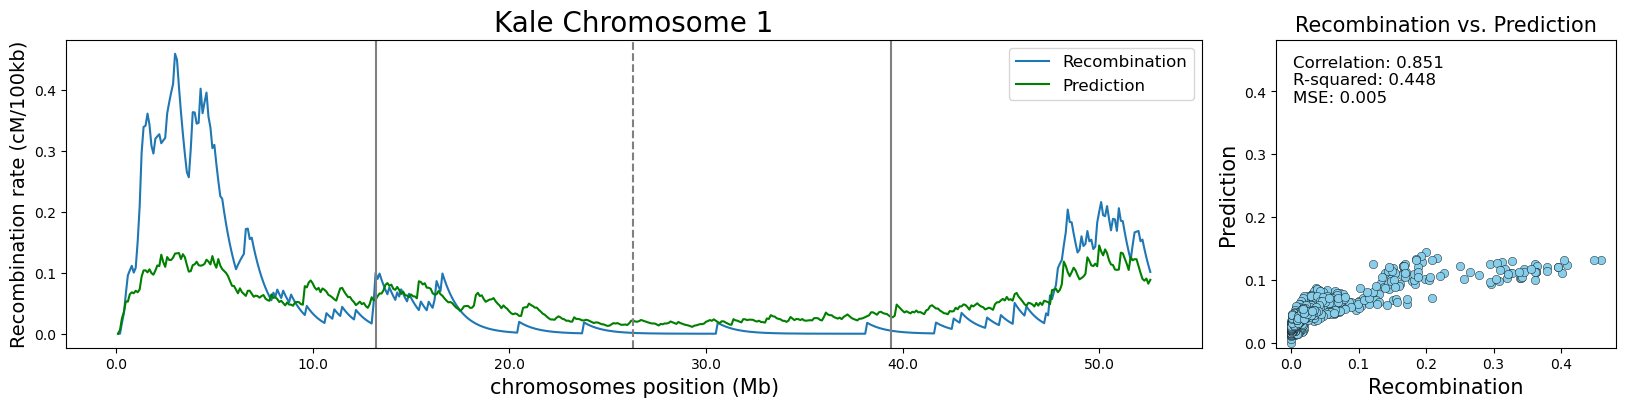

In [14]:
# Predictions for one chromosome, example: Chromosome 1
plot_chromosome_results(1)

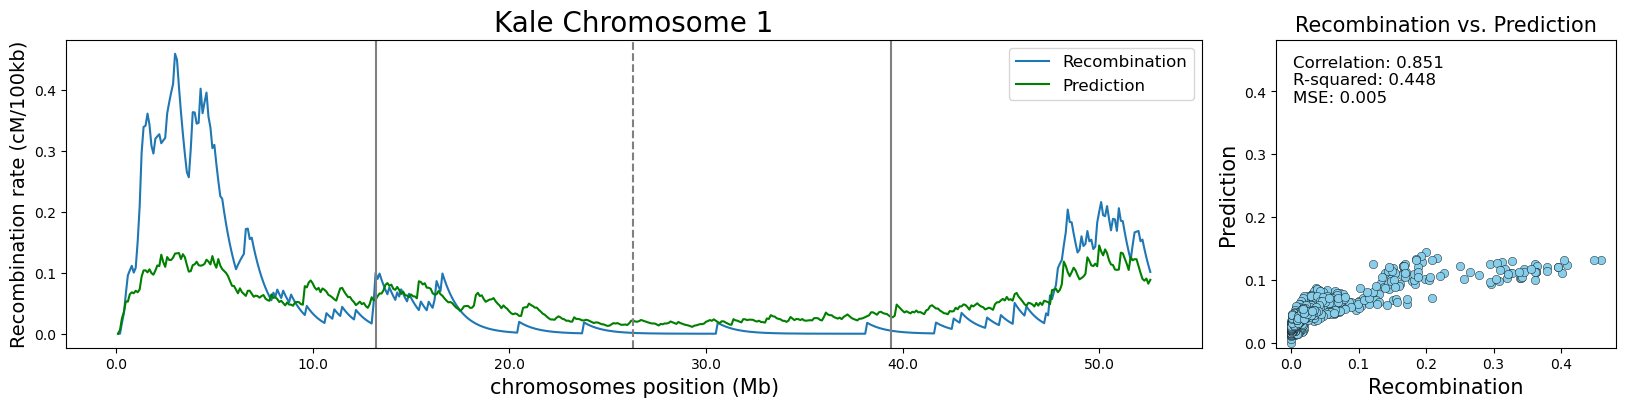

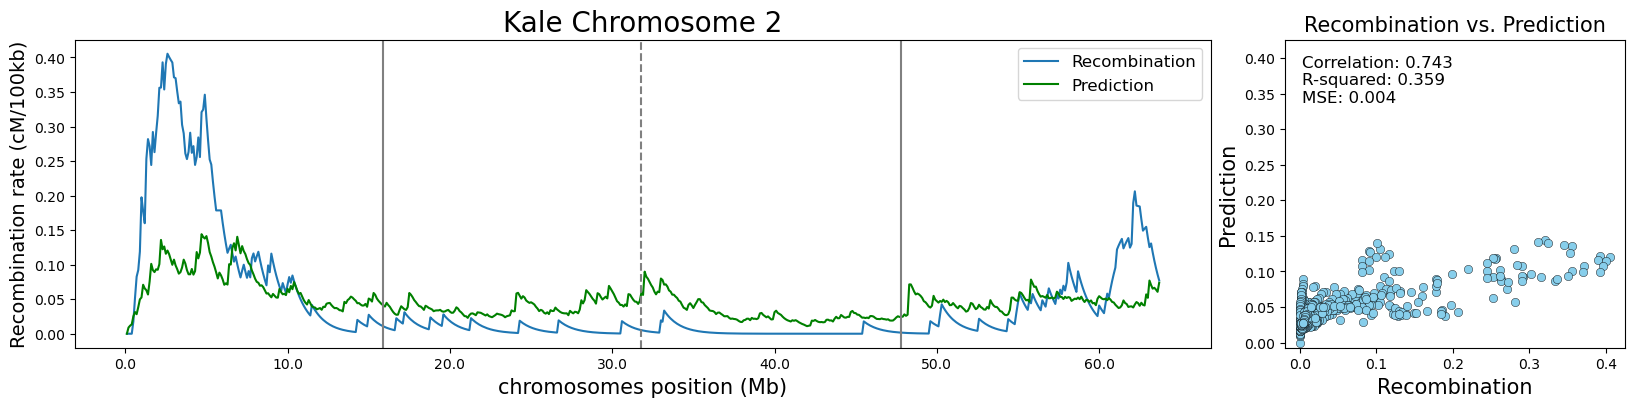

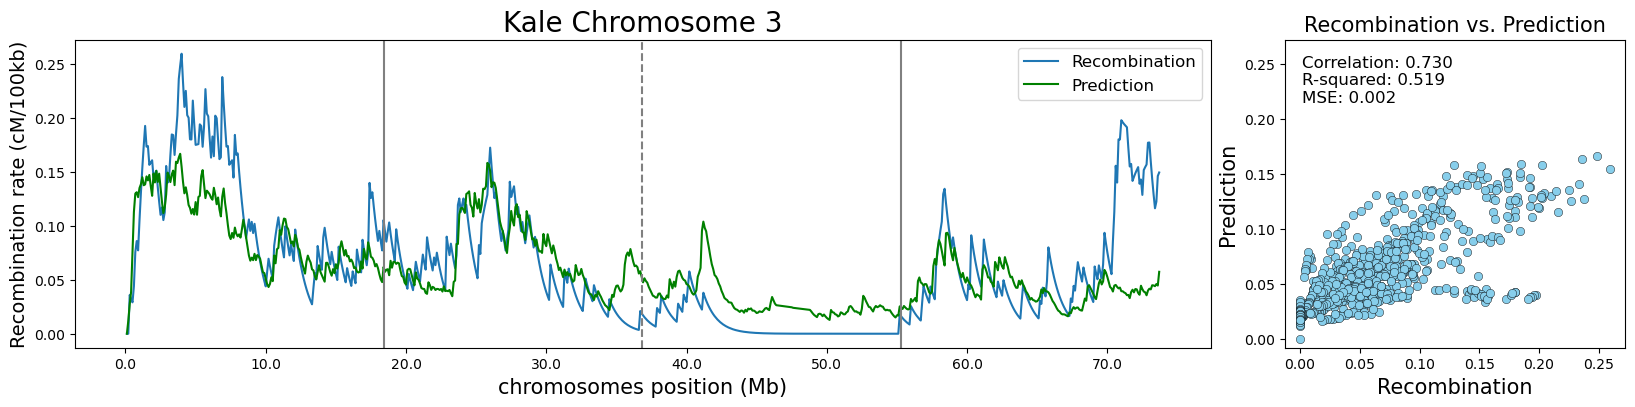

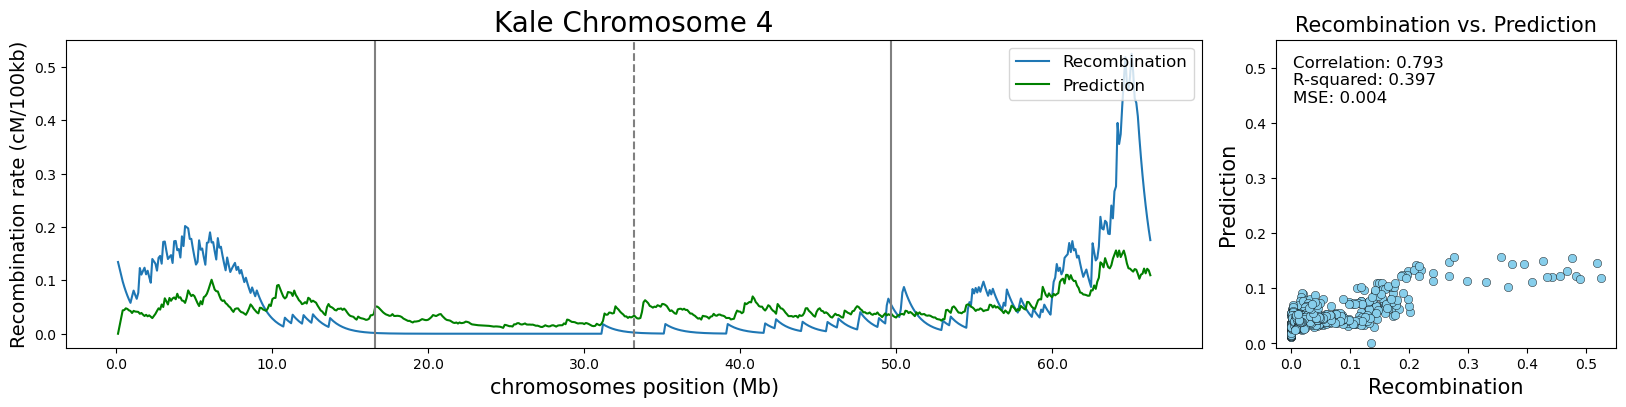

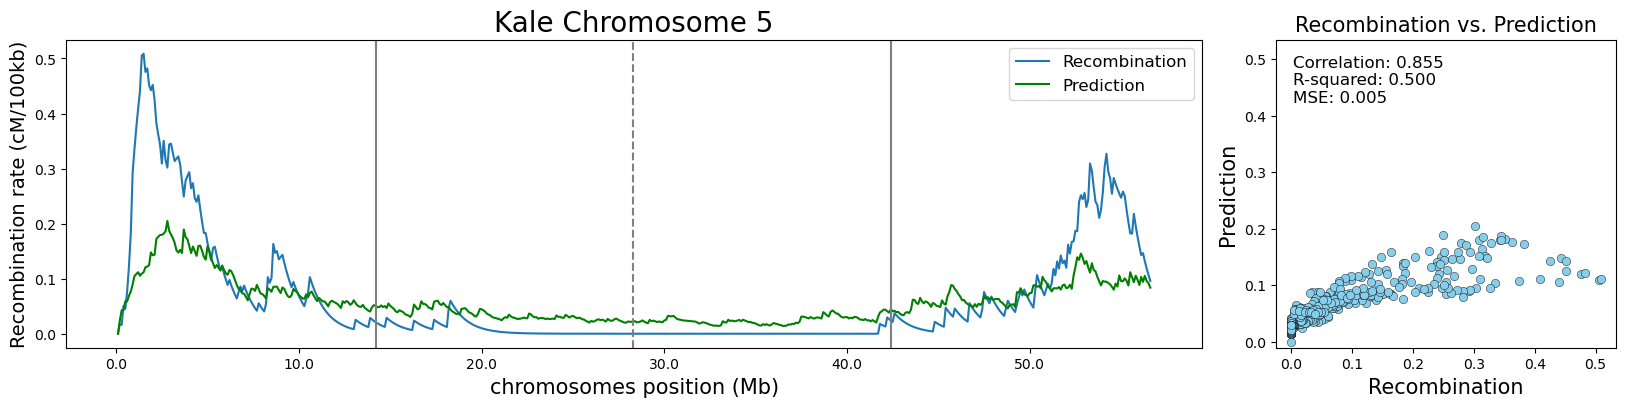

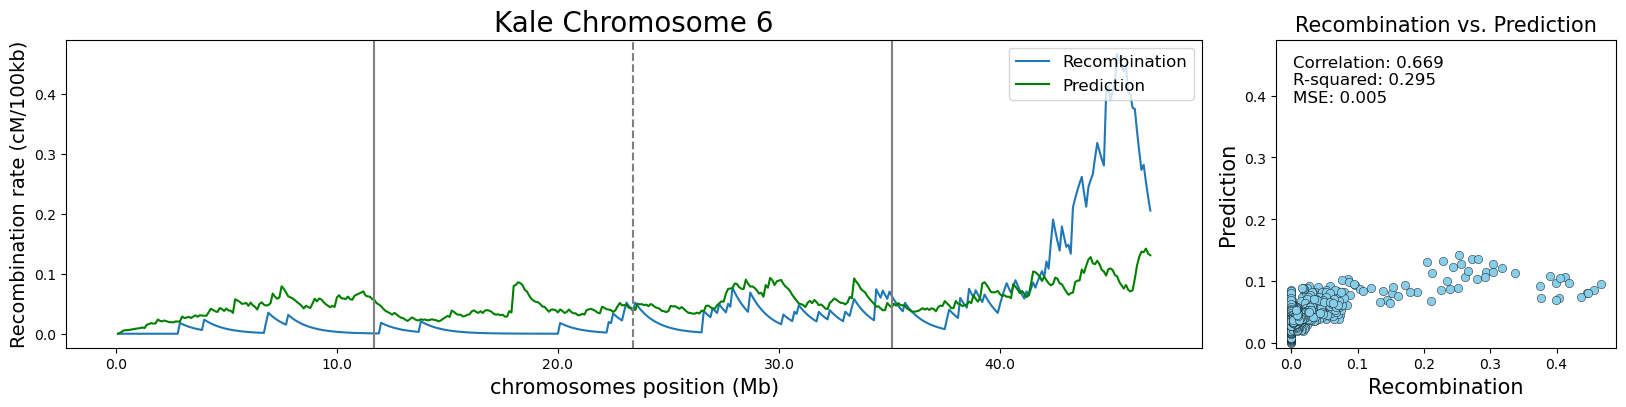

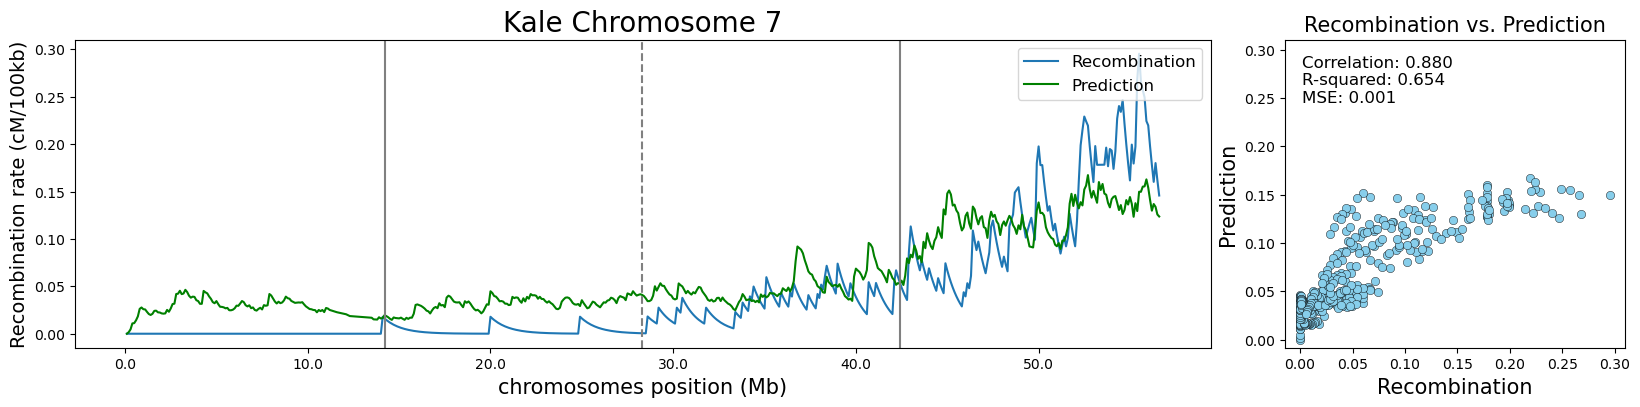

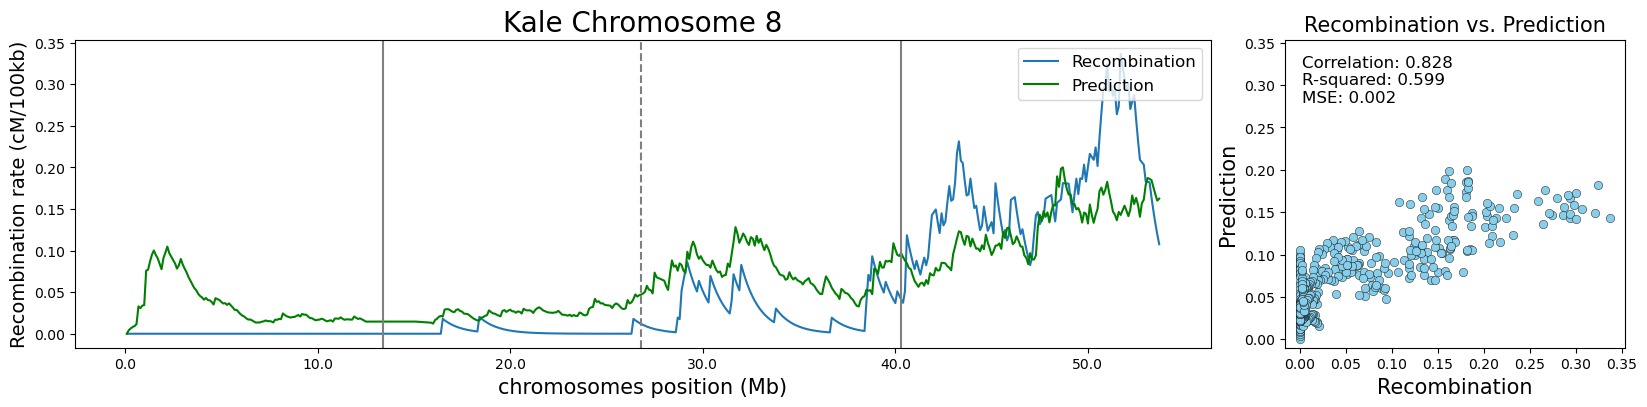

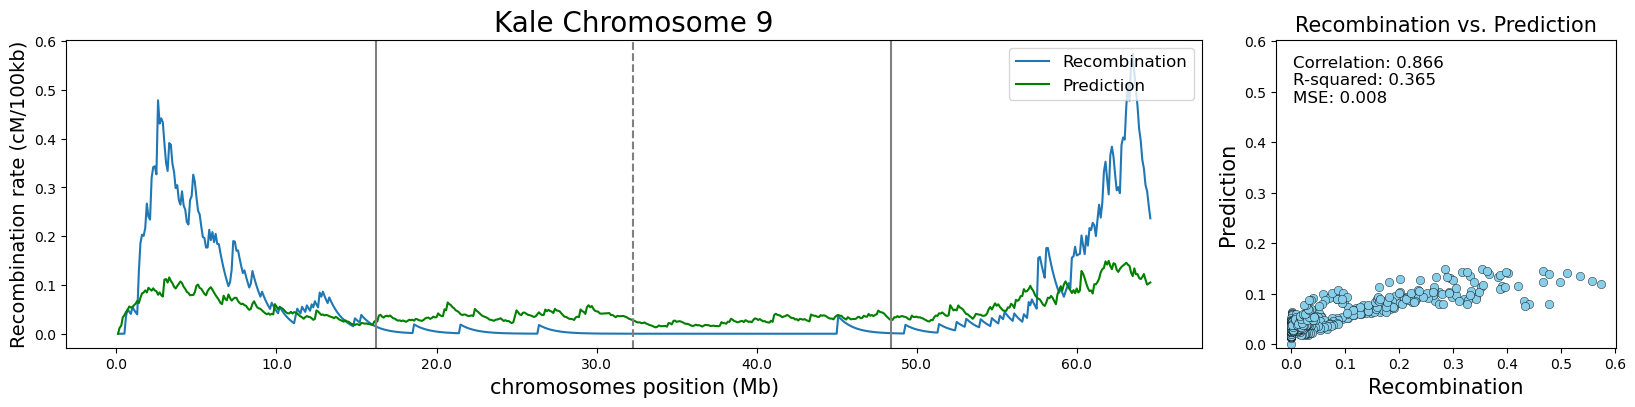

In [15]:
# Predictions and graphs for all chromosomes
for chr_number in range(1, 10):
    plot_chromosome_results(chr_number)
    plt.show()

# Data compilation

In [16]:
corr = pd.DataFrame({'corr':[corr_chr1, corr_chr2, corr_chr3, corr_chr4, corr_chr5, corr_chr6,corr_chr7,corr_chr8,corr_chr9,]})
r2 = pd.DataFrame({'R^2':[r2_chr1, r2_chr2, r2_chr3, r2_chr4, r2_chr5, r2_chr6, r2_chr7, r2_chr8, r2_chr9]})
mse = pd.DataFrame({'MSE':[mse_chr1, mse_chr2, mse_chr3, mse_chr4, mse_chr5, mse_chr6, mse_chr7, mse_chr8, mse_chr9]})
index = pd.DataFrame({'chr':['chr1','chr2','chr3','chr4','chr5','chr6','chr7','chr8','chr9',]})
k_table = pd.concat([index, corr, r2, mse], axis=1)
k_table

chr      corr       R^2       MSE
0  chr1  0.850839  0.448477  0.005167
1  chr2  0.742997  0.358895  0.004287
2  chr3  0.729888  0.518725  0.001518
3  chr4  0.793312  0.397013  0.004306
4  chr5  0.855310  0.500404  0.005264
5  chr6  0.668559  0.294552  0.005440
6  chr7  0.879796  0.653663  0.001287
7  chr8  0.827851  0.599254  0.002486
8  chr9  0.865543  0.365185  0.007912

Correlation between model predictions and recombination rates by quartiles

In [17]:
corr_q1 = pd.DataFrame({'Q1':[corr_q1_chr1,corr_q1_chr2,corr_q1_chr3,corr_q1_chr4,corr_q1_chr5,corr_q1_chr6,corr_q1_chr7,corr_q1_chr8,corr_q1_chr9]})
corr_q2 = pd.DataFrame({'Q2':[corr_q2_chr1,corr_q2_chr2,corr_q2_chr3,corr_q2_chr4,corr_q2_chr5,corr_q2_chr6,corr_q2_chr7,corr_q2_chr8,corr_q2_chr9]})
corr_q3 = pd.DataFrame({'Q3':[corr_q3_chr1,corr_q3_chr2,corr_q3_chr3,corr_q3_chr4,corr_q3_chr5,corr_q3_chr6,corr_q3_chr7,corr_q3_chr8,corr_q3_chr9]})
corr_q4 = pd.DataFrame({'Q4':[corr_q4_chr1,corr_q4_chr2,corr_q4_chr3,corr_q4_chr4,corr_q4_chr5,corr_q4_chr6,corr_q4_chr7,corr_q4_chr8,corr_q4_chr9]})

index = pd.DataFrame({'chr':['chr1','chr2','chr3','chr4','chr5','chr6','chr7','chr8','chr9']})
q_corr = pd.concat([index, corr_q1, corr_q2, corr_q3, corr_q4], axis=1)
q_corr_styled = q_corr.style.background_gradient(cmap="PRGn", vmin=-1, vmax=1)
q_corr_styled.set_table_styles([{'selector': 'th',
                                'props': [('text-align', 'center')]}])
q_corr_styled 

# WHITE GENOME

# Data exploration

In [18]:
df = w

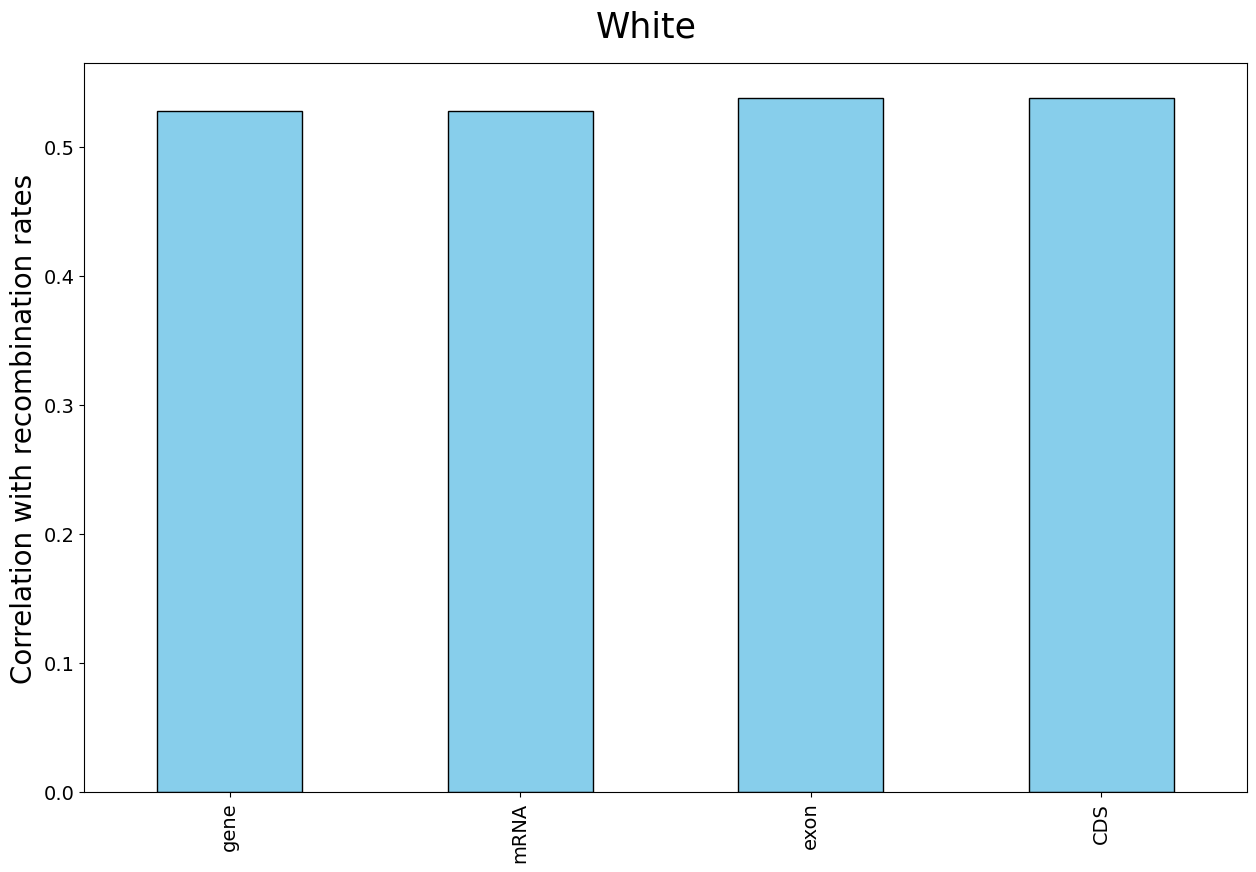

In [19]:
df_stats = df.drop(['cross', 'reference','chr','start','end'],  axis=1)
df_stats_corr = df_stats.corr()['srec'].sort_values(ascending = True)
df_corr = df_stats.corr()
df_corr = df_corr.iloc[1:, :]
fig = plt.figure(figsize=(15,9))
ax = fig.add_subplot(111)
df_corr['srec'].sort_values(ascending = True).plot(kind = 'bar', color='skyblue', edgecolor='black')
ax.set_ylabel('Correlation with recombination rates', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=14)
plt.suptitle('White', fontsize=25)
plt.subplots_adjust(top=0.92)

plt.show()

# Chromosome Split

In [20]:
chr1 = df[df['chr']== 'chr1']
chr2 = df[df['chr']== 'chr2']
chr3 = df[df['chr']== 'chr3']
chr4 = df[df['chr']== 'chr4']
chr5 = df[df['chr']== 'chr5']
chr6 = df[df['chr']== 'chr6']
chr7 = df[df['chr']== 'chr7']
chr8 = df[df['chr']== 'chr8']
chr9 = df[df['chr']== 'chr9']

In [21]:
achr1 = df[df['chr']!= 'chr1']
achr2 = df[df['chr']!= 'chr2']
achr3 = df[df['chr']!= 'chr3']
achr4 = df[df['chr']!= 'chr4']
achr5 = df[df['chr']!= 'chr5']
achr6 = df[df['chr']!= 'chr6']
achr7 = df[df['chr']!= 'chr7']
achr8 = df[df['chr']!= 'chr8']
achr9 = df[df['chr']!= 'chr9']

# Function to train models and make graphs

The model is trained with the information of all chromosomes except the information of the chromosome to be predicted.

In [22]:
def plot_chromosome_results(chr_number):
    # Replace  with 'chr{chr_number}' 
    chromosomes_data = globals()[f'achr{chr_number}']
    chr_data = globals()[f'chr{chr_number}']

    # TRAINING MODEL
    X_train = chromosomes_data.drop(['cross', 'reference','chr','start','end','srec'], axis=1)
    y_train = chromosomes_data[['srec']]
    
    model.fit(X_train, y_train)
    model_preds = model.predict(chr_data.drop(['cross', 'reference','chr','start','end','srec'], axis=1))
    
    #SMOOTHING
    model_spreds= np.zeros(len(model_preds))

    for i in  range(1, len(model_preds)): 
        model_spreds[i] = model_preds[i-1]*0.1 + model_spreds[i-1]*0.9
        
    #CORRELATIONS BY QUARTILES
    c_q1 = int(len(chr_data)*0.25)
    c_q2 = int(len(chr_data)*0.50)
    c_q3 = int(len(chr_data)*0.75)
    
    rq1 = chr_data['srec'].iloc[0:c_q1]
    rq2 = chr_data['srec'].iloc[c_q1:c_q2]
    rq3 = chr_data['srec'].iloc[c_q2:c_q3]
    rq4 = chr_data['srec'].iloc[c_q3:int(len(chr_data))]

    pq1 = model_spreds[0:c_q1]
    pq2 = model_spreds[c_q1:c_q2]
    pq3 = model_spreds[c_q2:c_q3]
    pq4 = model_spreds[c_q3:int(len(chr_data))]

    corr_q1 = np.corrcoef(rq1, pq1)[0, 1]
    corr_q2 = np.corrcoef(rq2, pq2)[0, 1]
    corr_q3 = np.corrcoef(rq3, pq3)[0, 1]
    corr_q4 = np.corrcoef(rq4, pq4)[0, 1]
    
    globals()[f'corr_q1_chr{chr_number}'] = corr_q1
    globals()[f'corr_q2_chr{chr_number}'] = corr_q2
    globals()[f'corr_q3_chr{chr_number}'] = corr_q3
    globals()[f'corr_q4_chr{chr_number}'] = corr_q4
     
    # PLOTTING RESULTS
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4), gridspec_kw={'width_ratios': [10, 3]})

    # Line plot and correlation plot
    ax1.plot(chr_data.end, chr_data.srec, label='Recombination')
    ax1.plot(chr_data.end, model_spreds, label='Prediction', color='green')
    ax1.set_title(f'White Chromosome {chr_number}', fontsize=20)
    ax1.set_xlabel('chromosomes position (Mb)', fontsize=15)
    ax1.set_ylabel('Recombination rate (cM/100kb)', fontsize=14)
    ax1.legend(loc='upper right', fontsize=12)
    ticks = ax1.get_xticks() / 1000000
    ax1.set_xticklabels(ticks)
        
    chr_len = chr_data["end"].iloc[-1]
    q1 =round(chr_len * 0.25 / 100000) * 100000
    q2 =round(chr_len* 0.50 / 100000) * 100000
    q3 =round(chr_len * 0.75 / 100000) * 100000

    ax1.axvline(x=q1, color='gray', linestyle='-')
    ax1.axvline(x=q2, color='gray', linestyle='--')
    ax1.axvline(x=q3, color='gray', linestyle='-')

    # Scatter plot
    scatter = ax2.scatter(chr_data.srec, model_spreds, c='skyblue', edgecolors='black', linewidth= 0.3)
    ax2.set_title('Recombination vs. Prediction', fontsize=15)
    ax2.set_xlabel('Recombination', fontsize=15)
    ax2.set_ylabel('Prediction', fontsize=15)

    # Calculate correlation coefficient, coefficient of determination, and Mean Squared Error
    corr_chr = np.corrcoef(chr_data.srec, model_spreds)[0, 1]
    r2_chr = r2_score(chr_data.srec, model_spreds)
    mse_chr = mean_squared_error(chr_data.srec, model_spreds)

    # Calculate the aspect ratio based on the plot heights
    h1 = ax1.get_ylim()
    h2 = ax2.get_ylim()
    aspect_ratio = max(h1[1] - h1[0], h2[1] - h2[0]) / (max(h1[1], h2[1]) - min(h1[0], h2[0]))

    # Set the aspect ratio for the scatter plot only if it doesn't distort the square shape
    if aspect_ratio < 1:
        ax2.set_aspect('equal')

    # Display correlation coefficient, coefficient of determination, and Mean Squared Error as plain text
    globals()[f'corr_chr{chr_number}'] = corr_chr
    globals()[f'r2_chr{chr_number}'] = r2_chr
    globals()[f'mse_chr{chr_number}'] = mse_chr

    textstr = f'Correlation: {corr_chr:.3f}\nR-squared: {r2_chr:.3f}\nMSE: {mse_chr:.3f}'
    ax2.text(0.05, 0.95, textstr, transform=ax2.transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left')

    # Adjustments to align the heights of the two plots
    max_height = max(h1[1], h2[1])
    ax1.set_ylim([h1[0], max_height])
    ax2.set_ylim([h2[0], max_height])

    # Reduce the separation between the plots
    plt.subplots_adjust(wspace=0.1)
    plt.show()

# Model Predictions

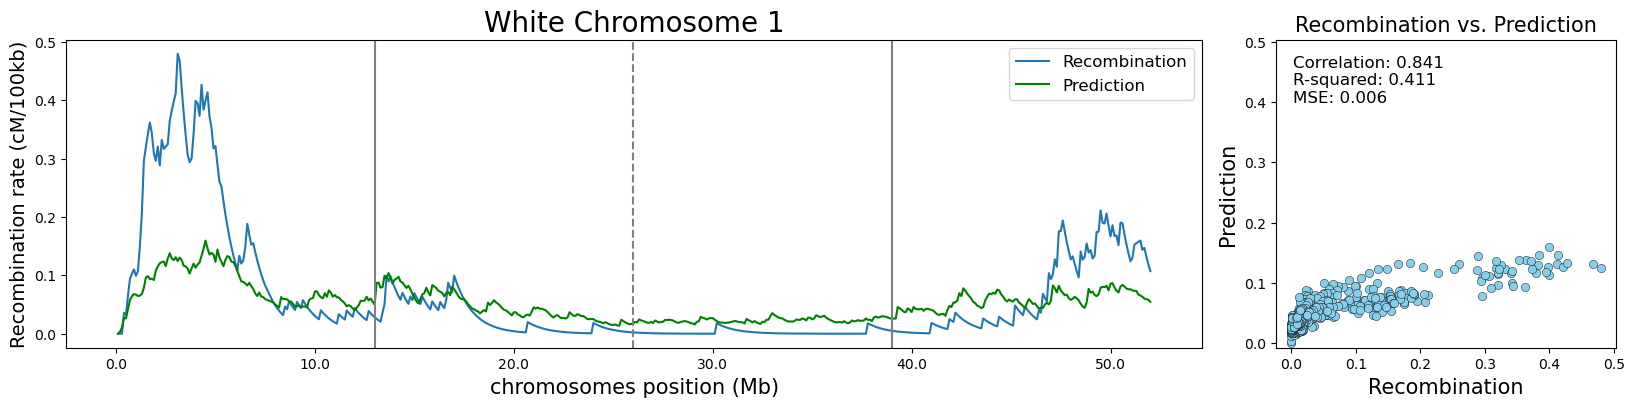

In [23]:
# For one chromosome, example Chromosome 1
plot_chromosome_results(1)

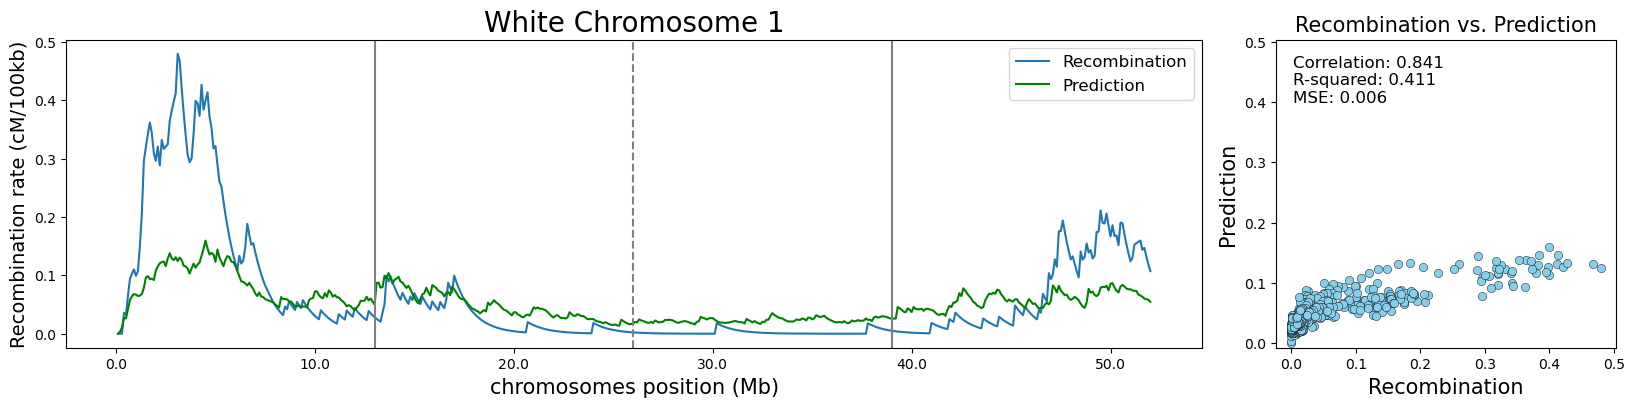

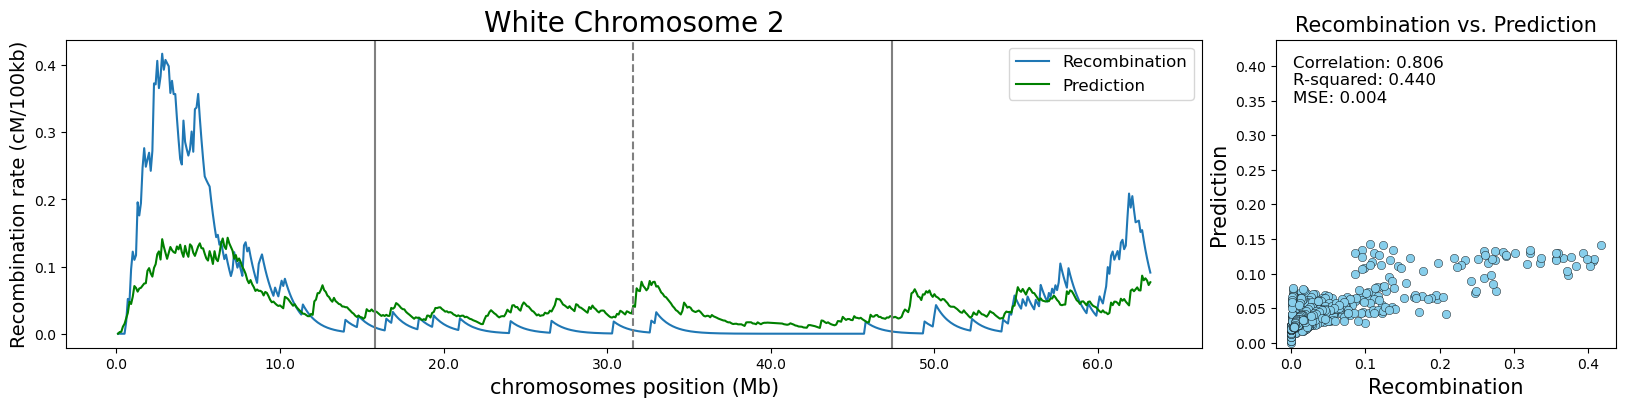

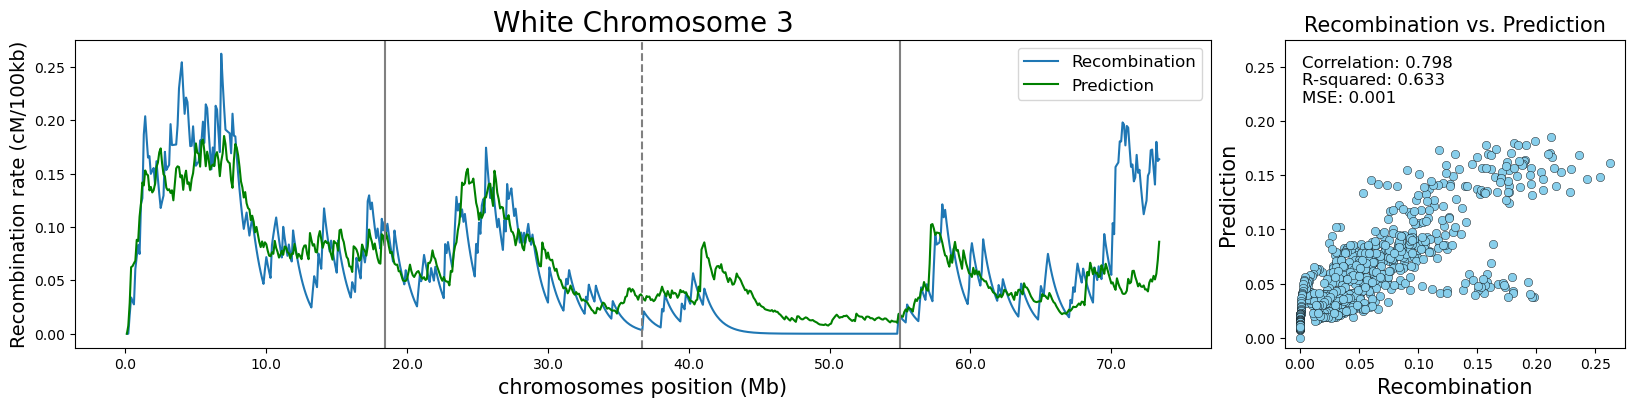

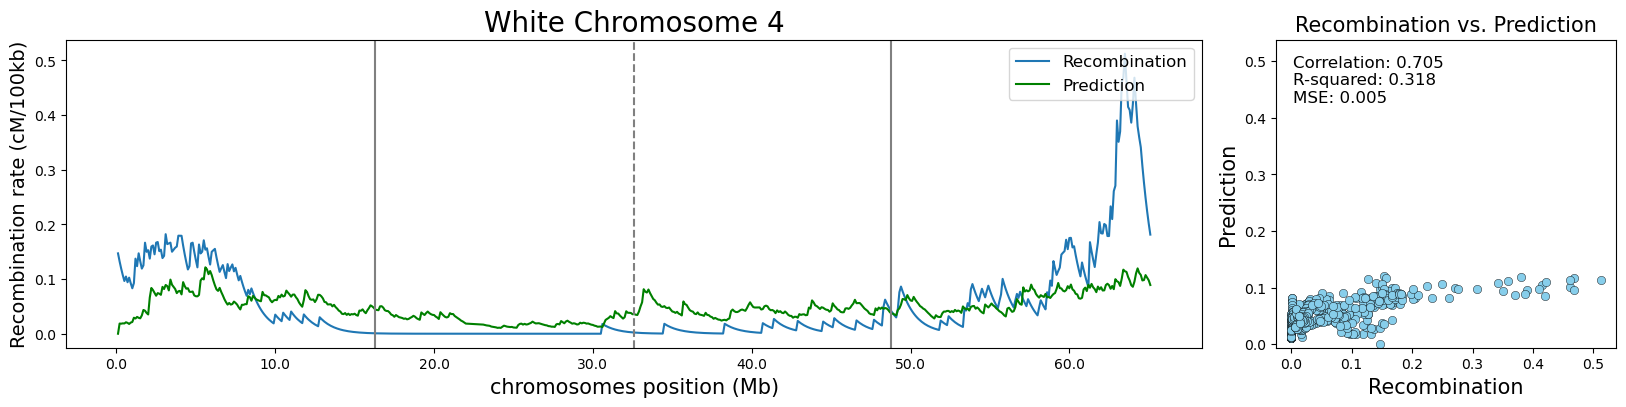

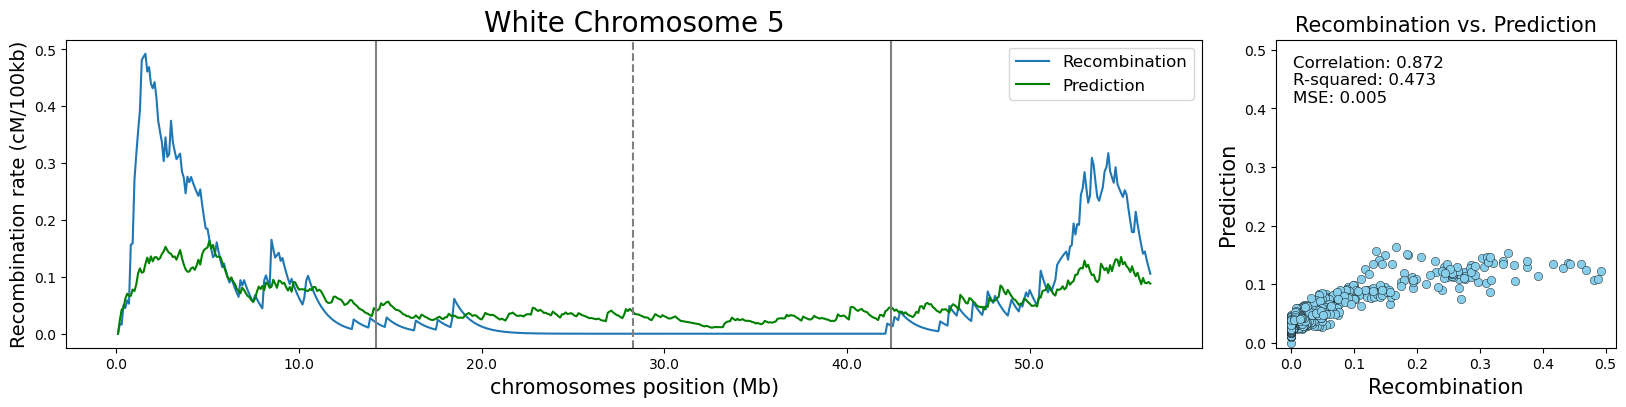

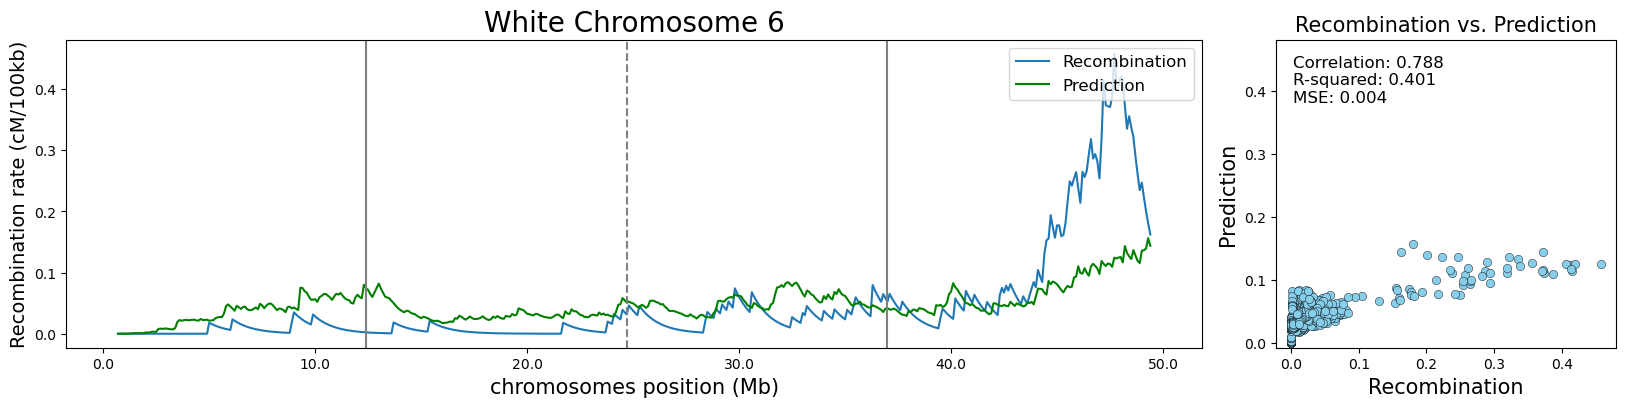

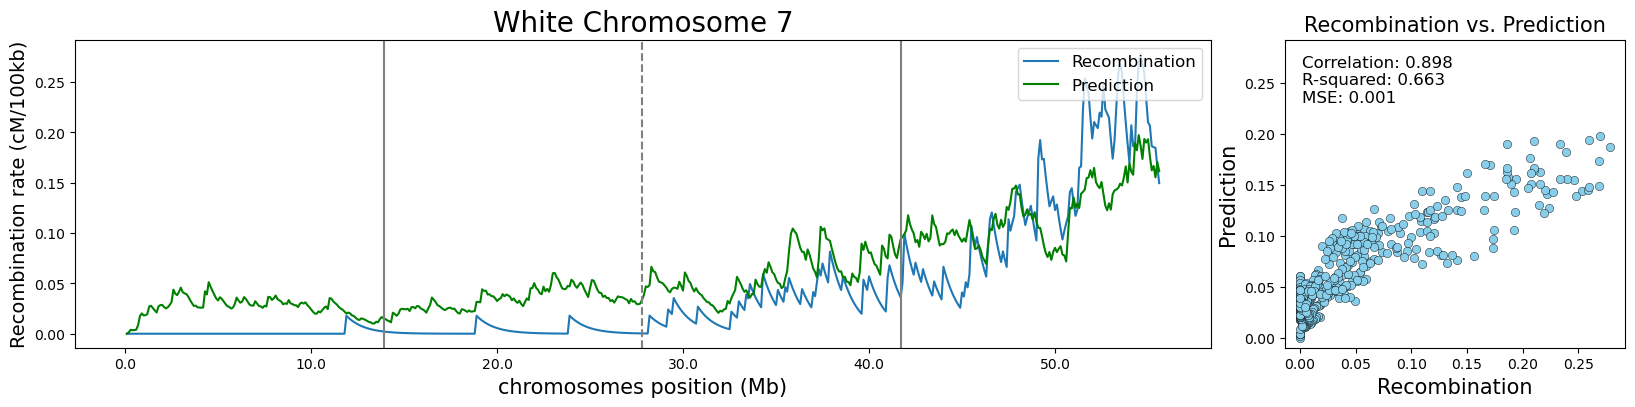

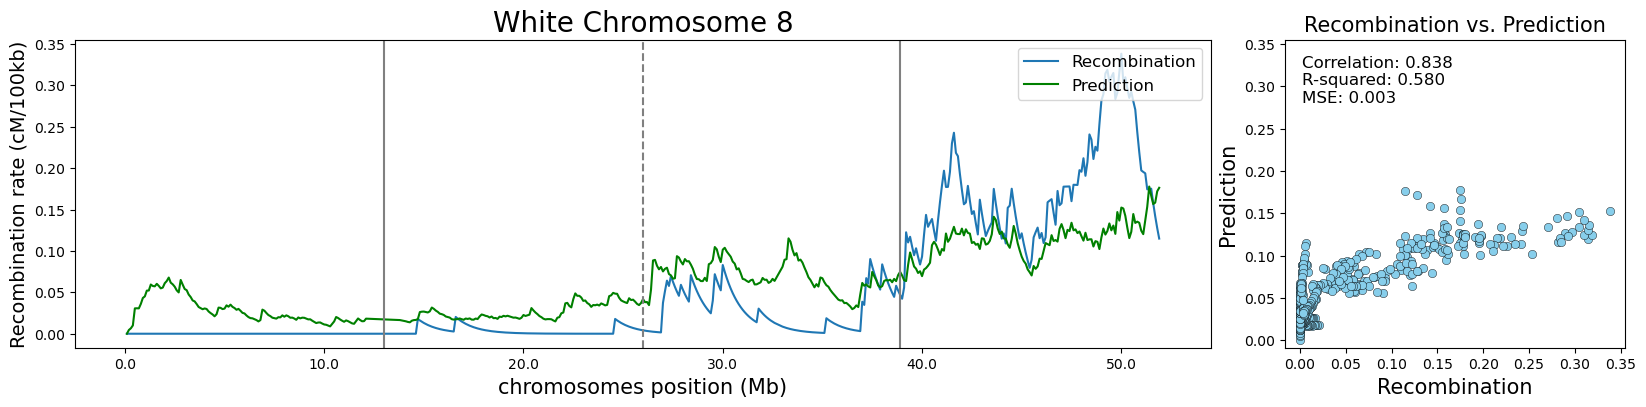

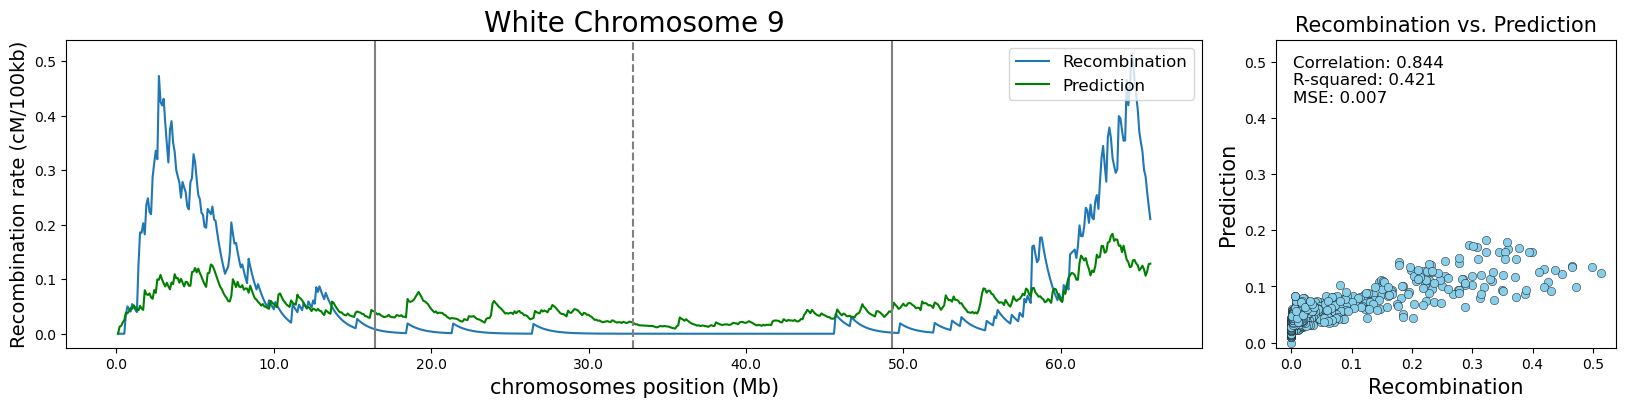

In [24]:
# Predictions and graphs for all chromosomes
for chr_number in range(1, 10):
    plot_chromosome_results(chr_number)
    plt.show()

# Data compilation

In [25]:
corr = pd.DataFrame({'corr':[corr_chr1, corr_chr2, corr_chr3, corr_chr4, corr_chr5, corr_chr6,corr_chr7,corr_chr8,corr_chr9,]})
r2 = pd.DataFrame({'R^2':[r2_chr1, r2_chr2, r2_chr3, r2_chr4, r2_chr5, r2_chr6, r2_chr7, r2_chr8, r2_chr9]})
mse = pd.DataFrame({'MSE':[mse_chr1, mse_chr2, mse_chr3, mse_chr4, mse_chr5, mse_chr6, mse_chr7, mse_chr8, mse_chr9]})
index = pd.DataFrame({'chr':['chr1','chr2','chr3','chr4','chr5','chr6','chr7','chr8','chr9',]})
w_table = pd.concat([index, corr, r2, mse], axis=1)
w_table

chr      corr       R^2       MSE
0  chr1  0.841008  0.410805  0.005733
1  chr2  0.806246  0.440283  0.003899
2  chr3  0.797688  0.632985  0.001200
3  chr4  0.705293  0.318104  0.004626
4  chr5  0.872236  0.473100  0.005499
5  chr6  0.787734  0.400882  0.004312
6  chr7  0.897511  0.663213  0.001354
7  chr8  0.837607  0.580421  0.002697
8  chr9  0.844061  0.420808  0.006803

Correlation between model predictions and recombination rates by quartiles

In [26]:
corr_q1 = pd.DataFrame({'Q1':[corr_q1_chr1,corr_q1_chr2,corr_q1_chr3,corr_q1_chr4,corr_q1_chr5,corr_q1_chr6,corr_q1_chr7,corr_q1_chr8,corr_q1_chr9]})
corr_q2 = pd.DataFrame({'Q2':[corr_q2_chr1,corr_q2_chr2,corr_q2_chr3,corr_q2_chr4,corr_q2_chr5,corr_q2_chr6,corr_q2_chr7,corr_q2_chr8,corr_q2_chr9]})
corr_q3 = pd.DataFrame({'Q3':[corr_q3_chr1,corr_q3_chr2,corr_q3_chr3,corr_q3_chr4,corr_q3_chr5,corr_q3_chr6,corr_q3_chr7,corr_q3_chr8,corr_q3_chr9]})
corr_q4 = pd.DataFrame({'Q4':[corr_q4_chr1,corr_q4_chr2,corr_q4_chr3,corr_q4_chr4,corr_q4_chr5,corr_q4_chr6,corr_q4_chr7,corr_q4_chr8,corr_q4_chr9]})

index = pd.DataFrame({'chr':['chr1','chr2','chr3','chr4','chr5','chr6','chr7','chr8','chr9']})
q_corr = pd.concat([index, corr_q1, corr_q2, corr_q3, corr_q4], axis=1)
q_corr_styled = q_corr.style.background_gradient(cmap="PRGn", vmin=-1, vmax=1)
q_corr_styled.set_table_styles([{'selector': 'th',
                                'props': [('text-align', 'center')]}])
q_corr_styled 

# Prediction performance of models trained with Kale data and White data.

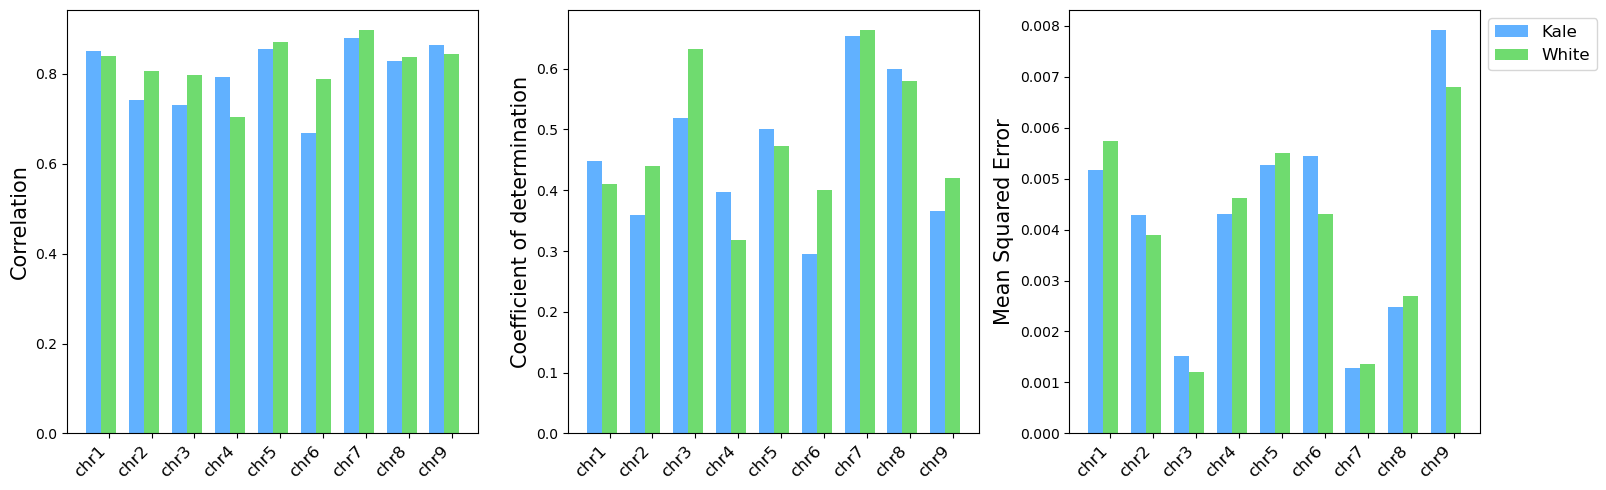

In [27]:
# Adjusting bar width
bar_width = 0.35

# Creating data positions
bar_positions_k = np.arange(len(k_table['chr']))
bar_positions_w = bar_positions_k + bar_width

# Creating subplots (1 row, 3 columns)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# First chart
axs[0].bar(bar_positions_k, k_table['corr'], color='dodgerblue', width=bar_width, label='Kale', alpha=0.7)
axs[0].bar(bar_positions_w, w_table['corr'], color='limegreen', width=bar_width, label='White', alpha=0.7)

axs[0].set_ylabel('Correlation', fontsize=15)

# Second chart
axs[1].bar(bar_positions_k, k_table['R^2'], color='dodgerblue', width=bar_width, label='Kale', alpha=0.7)
axs[1].bar(bar_positions_w, w_table['R^2'], color='limegreen', width=bar_width, label='White', alpha=0.7)

axs[1].set_ylabel('Coefficient of determination', fontsize=15)

# Third chart
axs[2].bar(bar_positions_k, k_table['MSE'], color='dodgerblue', width=bar_width, label='Kale', alpha=0.7)
axs[2].bar(bar_positions_w, w_table['MSE'], color='limegreen', width=bar_width, label='White', alpha=0.7)

axs[2].set_ylabel('Mean Squared Error', fontsize=15)

# Get chromosome labels from the 'chr' column
chr_labels = k_table['chr']

# Set x-axis labels for all three subplots
for ax in axs:
    ax.set_xticks(bar_positions_w)
    ax.set_xticklabels(chr_labels)

# Rotate labels for better readability
for ax in axs:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)

# Adjusting layout
plt.tight_layout()

# Place legend outside the subplots and above the last subplot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

# Show the figure
plt.show()

# Model trained with all Kale chromosomes to predict recombination on each White chromosome

In [28]:
# TRAINING MODEL with Kale data
X_train = k.drop(['cross', 'reference','chr','start','end','srec'], axis=1)
y_train = k[['srec']]

model.fit(X_train, y_train)

ExtraTreesRegressor(random_state=1)

In [29]:
# Objects with White data per chromosome
chr1 = w[w['chr']== 'chr1']
chr2 = w[w['chr']== 'chr2']
chr3 = w[w['chr']== 'chr3']
chr4 = w[w['chr']== 'chr4']
chr5 = w[w['chr']== 'chr5']
chr6 = w[w['chr']== 'chr6']
chr7 = w[w['chr']== 'chr7']
chr8 = w[w['chr']== 'chr8']
chr9 = w[w['chr']== 'chr9']

In [30]:
def plot_chromosome_results(chr_number):
    # Replace  with 'chr{chr_number}' 
    chromosomes_data = globals()[f'achr{chr_number}']
    chr_data = globals()[f'chr{chr_number}']

    # MODEL PREDICTIONS
    model_preds = model.predict(chr_data.drop(['cross', 'reference','chr','start','end','srec'], axis=1))
    
    #SMOOTHING
    model_spreds= np.zeros(len(model_preds))

    for i in  range(1, len(model_preds)): 
        model_spreds[i] = model_preds[i-1]*0.1 + model_spreds[i-1]*0.9
        
    #CORRELATIONS BY QUARTILES
    c_q1 = int(len(chr_data)*0.25)
    c_q2 = int(len(chr_data)*0.50)
    c_q3 = int(len(chr_data)*0.75)
    
    rq1 = chr_data['srec'].iloc[0:c_q1]
    rq2 = chr_data['srec'].iloc[c_q1:c_q2]
    rq3 = chr_data['srec'].iloc[c_q2:c_q3]
    rq4 = chr_data['srec'].iloc[c_q3:int(len(chr_data))]

    pq1 = model_spreds[0:c_q1]
    pq2 = model_spreds[c_q1:c_q2]
    pq3 = model_spreds[c_q2:c_q3]
    pq4 = model_spreds[c_q3:int(len(chr_data))]

    corr_q1 = np.corrcoef(rq1, pq1)[0, 1]
    corr_q2 = np.corrcoef(rq2, pq2)[0, 1]
    corr_q3 = np.corrcoef(rq3, pq3)[0, 1]
    corr_q4 = np.corrcoef(rq4, pq4)[0, 1]
    
    globals()[f'corr_q1_chr{chr_number}'] = corr_q1
    globals()[f'corr_q2_chr{chr_number}'] = corr_q2
    globals()[f'corr_q3_chr{chr_number}'] = corr_q3
    globals()[f'corr_q4_chr{chr_number}'] = corr_q4
     
    # PLOTTING RESULTS
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4), gridspec_kw={'width_ratios': [10, 3]})

    # Line plot and correlation plot
    ax1.plot(chr_data.end, chr_data.srec, label='Recombination')
    ax1.plot(chr_data.end, model_spreds, label='Prediction', color='green')
    ax1.set_title(f'White Chromosome {chr_number}', fontsize=20)
    ax1.set_xlabel('chromosomes position (Mb)', fontsize=15)
    ax1.set_ylabel('Recombination rate (cM/100kb)', fontsize=14)
    ax1.legend(loc='upper right', fontsize=12)
    ticks = ax1.get_xticks() / 1000000
    ax1.set_xticklabels(ticks)
        
    chr_len = chr_data["end"].iloc[-1]
    q1 =round(chr_len * 0.25 / 100000) * 100000
    q2 =round(chr_len* 0.50 / 100000) * 100000
    q3 =round(chr_len * 0.75 / 100000) * 100000

    ax1.axvline(x=q1, color='gray', linestyle='-')
    ax1.axvline(x=q2, color='gray', linestyle='--')
    ax1.axvline(x=q3, color='gray', linestyle='-')

    # Scatter plot
    scatter = ax2.scatter(chr_data.srec, model_spreds, c='skyblue', edgecolors='black', linewidth= 0.3)
    ax2.set_title('Recombination vs. Prediction', fontsize=15)
    ax2.set_xlabel('Recombination', fontsize=15)
    ax2.set_ylabel('Prediction', fontsize=15)

    # Calculate correlation coefficient, coefficient of determination, and Mean Squared Error
    corr_chr = np.corrcoef(chr_data.srec, model_spreds)[0, 1]
    r2_chr = r2_score(chr_data.srec, model_spreds)
    mse_chr = mean_squared_error(chr_data.srec, model_spreds)

    # Calculate the aspect ratio based on the plot heights
    h1 = ax1.get_ylim()
    h2 = ax2.get_ylim()
    aspect_ratio = max(h1[1] - h1[0], h2[1] - h2[0]) / (max(h1[1], h2[1]) - min(h1[0], h2[0]))

    # Set the aspect ratio for the scatter plot only if it doesn't distort the square shape
    if aspect_ratio < 1:
        ax2.set_aspect('equal')

    # Display correlation coefficient, coefficient of determination, and Mean Squared Error as plain text
    globals()[f'corr_chr{chr_number}'] = corr_chr
    globals()[f'r2_chr{chr_number}'] = r2_chr
    globals()[f'mse_chr{chr_number}'] = mse_chr

    textstr = f'Correlation: {corr_chr:.3f}\nR-squared: {r2_chr:.3f}\nMSE: {mse_chr:.3f}'
    ax2.text(0.05, 0.95, textstr, transform=ax2.transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left')

    # Adjustments to align the heights of the two plots
    max_height = max(h1[1], h2[1])
    ax1.set_ylim([h1[0], max_height])
    ax2.set_ylim([h2[0], max_height])

    # Reduce the separation between the plots
    plt.subplots_adjust(wspace=0.1)
    plt.show()

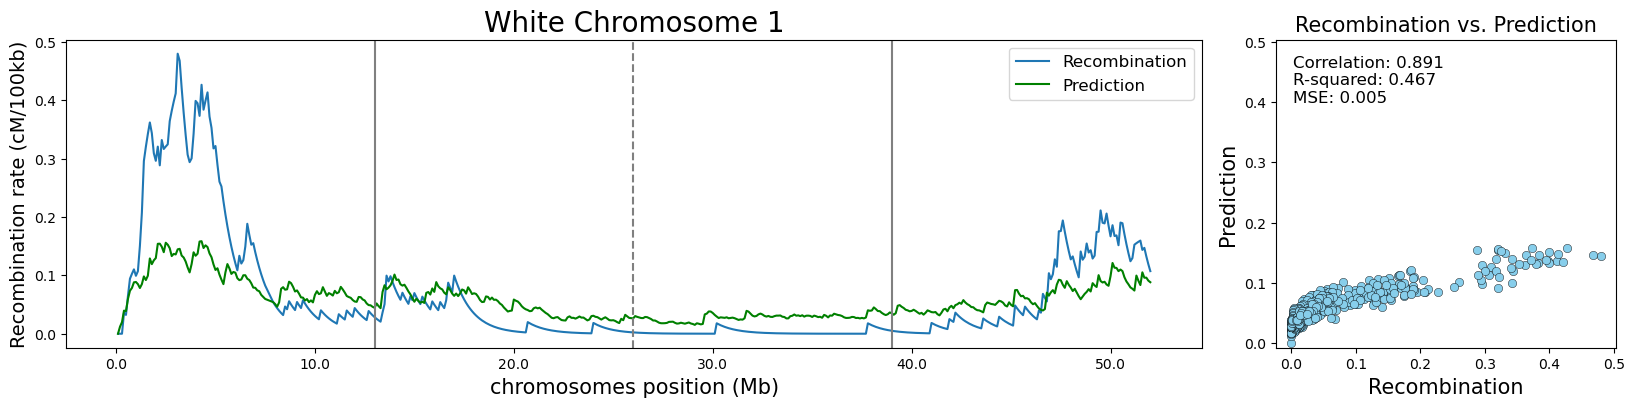

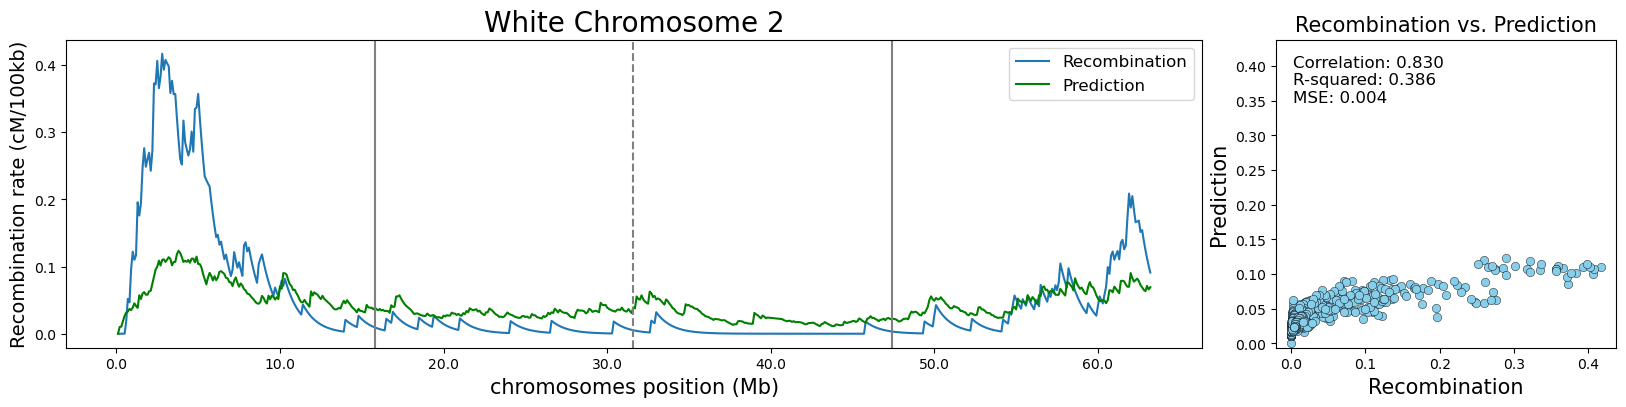

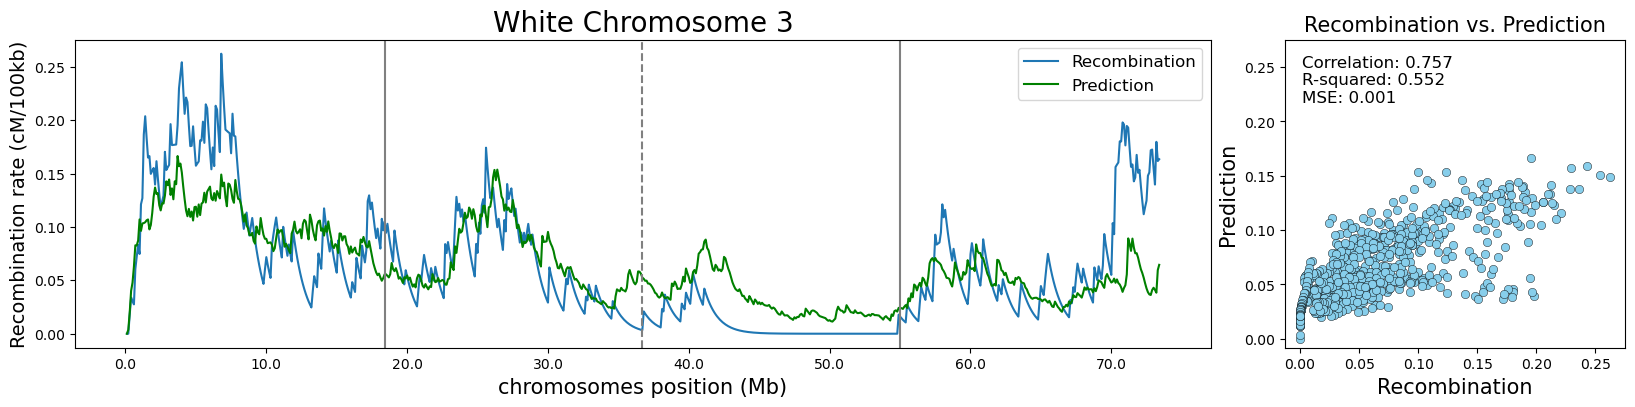

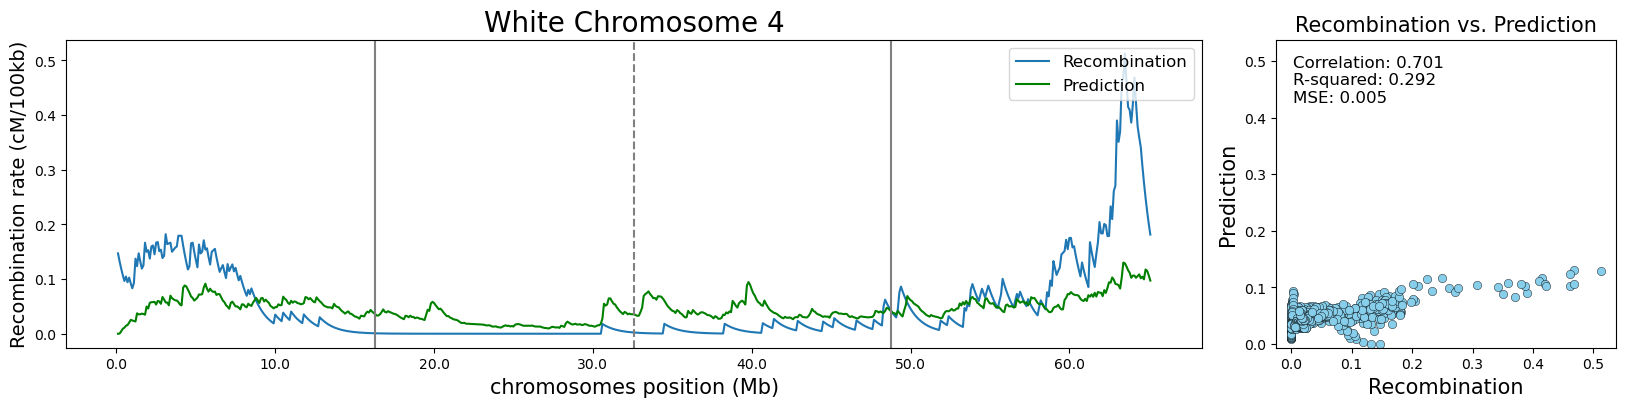

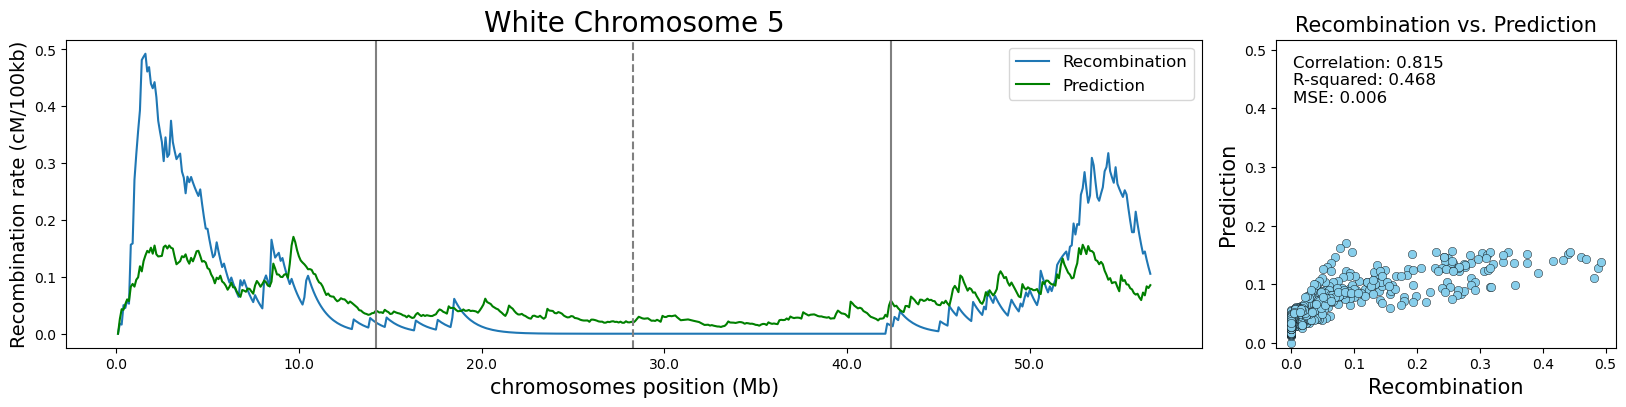

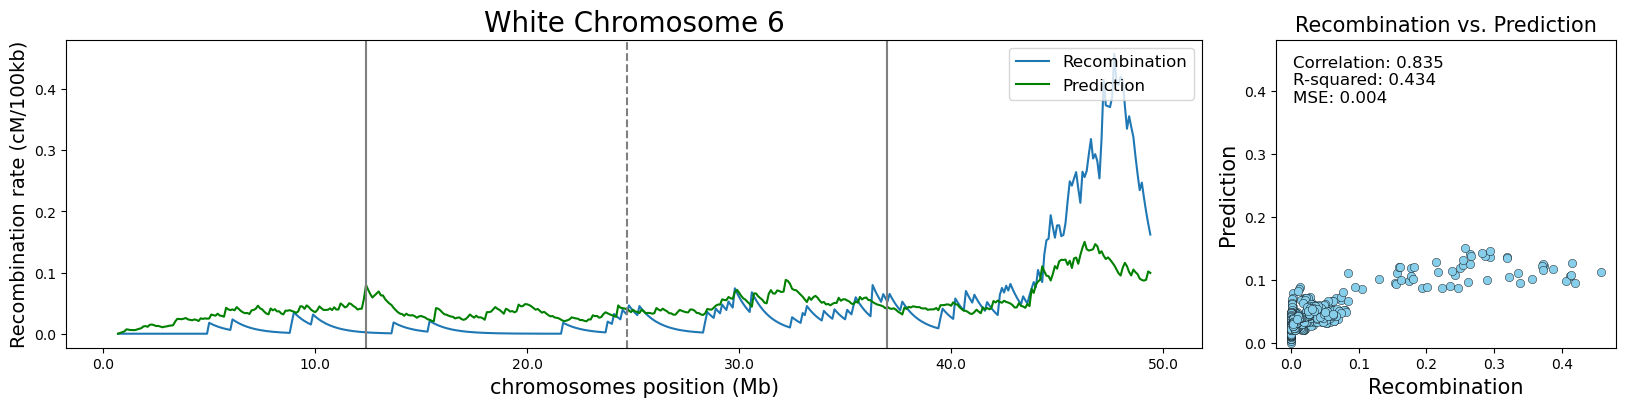

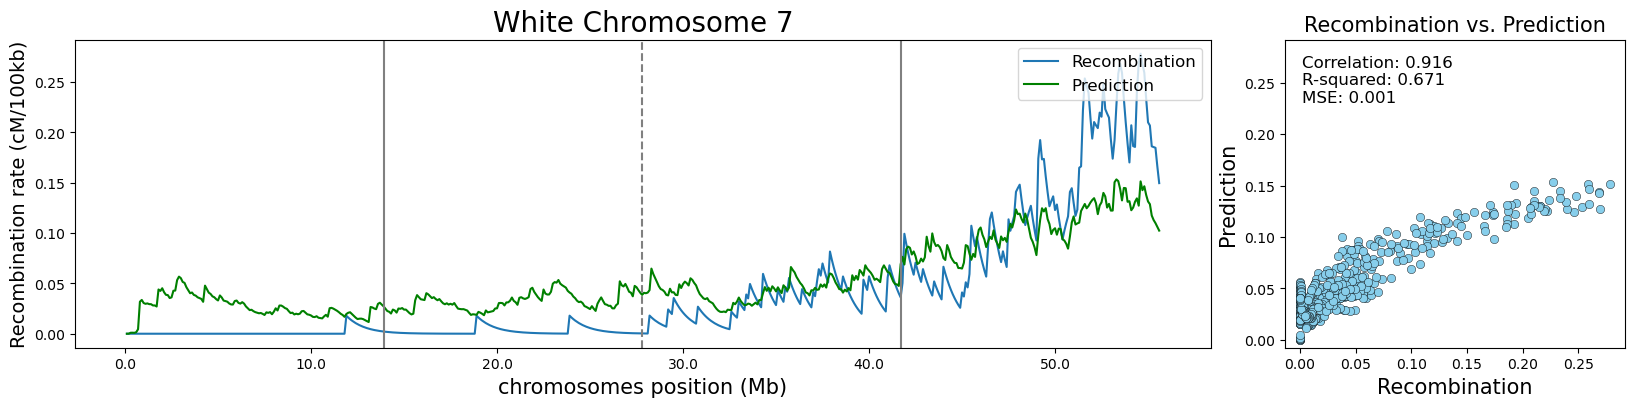

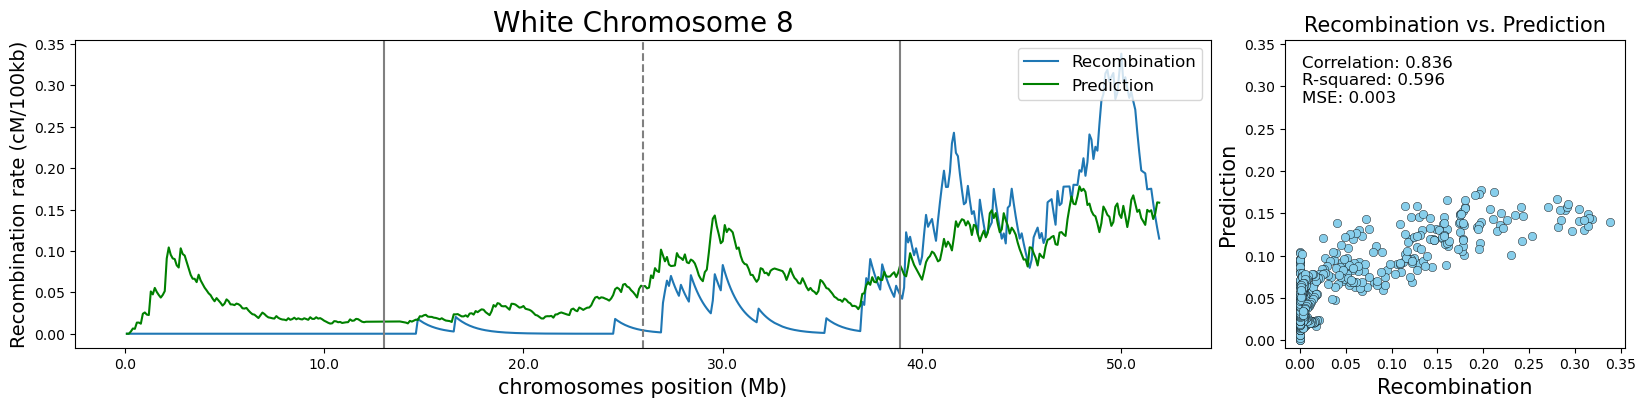

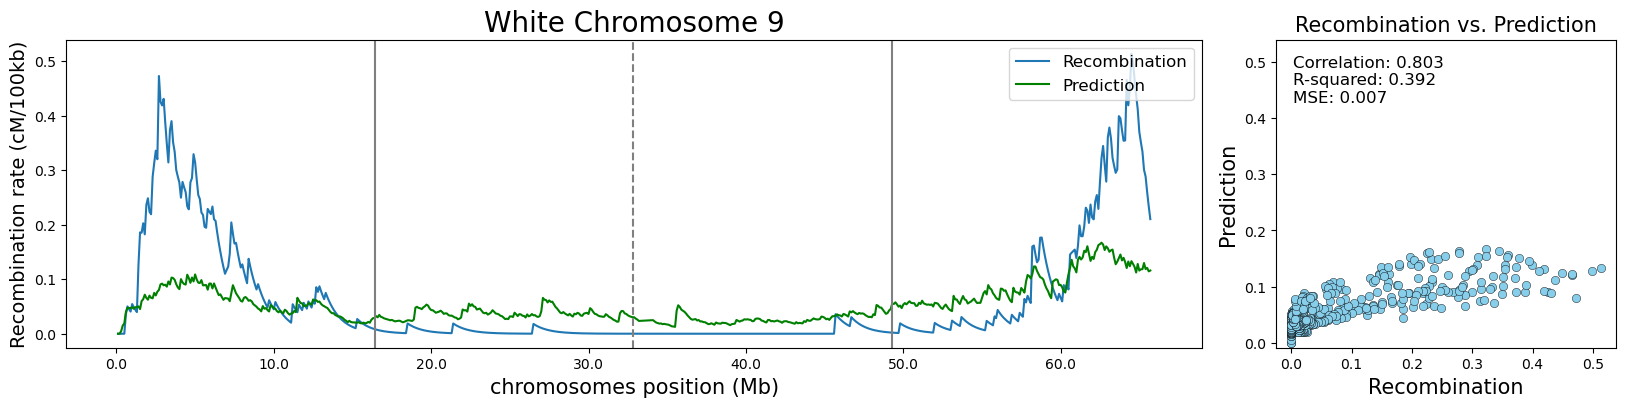

In [31]:
# Predictions and graphs for all chromosomes
for chr_number in range(1, 10):
    plot_chromosome_results(chr_number)
    plt.show()

# Data compilation

In [32]:
corr = pd.DataFrame({'corr':[corr_chr1, corr_chr2, corr_chr3, corr_chr4, corr_chr5, corr_chr6,corr_chr7,corr_chr8,corr_chr9,]})
r2 = pd.DataFrame({'R^2':[r2_chr1, r2_chr2, r2_chr3, r2_chr4, r2_chr5, r2_chr6, r2_chr7, r2_chr8, r2_chr9]})
mse = pd.DataFrame({'MSE':[mse_chr1, mse_chr2, mse_chr3, mse_chr4, mse_chr5, mse_chr6, mse_chr7, mse_chr8, mse_chr9]})
index = pd.DataFrame({'chr':['chr1','chr2','chr3','chr4','chr5','chr6','chr7','chr8','chr9',]})
tk_pw_table = pd.concat([index, corr, r2, mse], axis=1)
tk_pw_table

chr      corr       R^2       MSE
0  chr1  0.890995  0.467255  0.005184
1  chr2  0.830450  0.385590  0.004280
2  chr3  0.757429  0.552376  0.001463
3  chr4  0.700650  0.291567  0.004806
4  chr5  0.814883  0.468108  0.005551
5  chr6  0.835149  0.434035  0.004073
6  chr7  0.916239  0.670971  0.001322
7  chr8  0.836222  0.595678  0.002599
8  chr9  0.803181  0.391798  0.007144

Correlation between model predictions and recombination rates by quartiles

In [33]:
corr_q1 = pd.DataFrame({'Q1':[corr_q1_chr1,corr_q1_chr2,corr_q1_chr3,corr_q1_chr4,corr_q1_chr5,corr_q1_chr6,corr_q1_chr7,corr_q1_chr8,corr_q1_chr9]})
corr_q2 = pd.DataFrame({'Q2':[corr_q2_chr1,corr_q2_chr2,corr_q2_chr3,corr_q2_chr4,corr_q2_chr5,corr_q2_chr6,corr_q2_chr7,corr_q2_chr8,corr_q2_chr9]})
corr_q3 = pd.DataFrame({'Q3':[corr_q3_chr1,corr_q3_chr2,corr_q3_chr3,corr_q3_chr4,corr_q3_chr5,corr_q3_chr6,corr_q3_chr7,corr_q3_chr8,corr_q3_chr9]})
corr_q4 = pd.DataFrame({'Q4':[corr_q4_chr1,corr_q4_chr2,corr_q4_chr3,corr_q4_chr4,corr_q4_chr5,corr_q4_chr6,corr_q4_chr7,corr_q4_chr8,corr_q4_chr9]})

index = pd.DataFrame({'chr':['chr1','chr2','chr3','chr4','chr5','chr6','chr7','chr8','chr9']})
q_corr = pd.concat([index, corr_q1, corr_q2, corr_q3, corr_q4], axis=1)
q_corr_styled = q_corr.style.background_gradient(cmap="PRGn", vmin=-1, vmax=1)
q_corr_styled.set_table_styles([{'selector': 'th',
                                'props': [('text-align', 'center')]}])
q_corr_styled 

# Model trained with all White chromosomes to predict recombination on each Kale chromosome

In [34]:
# TRAINING MODEL with White data
X_train = w.drop(['cross', 'reference','chr','start','end','srec'], axis=1)
y_train = w[['srec']]

model.fit(X_train, y_train)

ExtraTreesRegressor(random_state=1)

In [35]:
# Okjects with Kale data per chromosome
chr1 = k[k['chr']== 'chr1']
chr2 = k[k['chr']== 'chr2']
chr3 = k[k['chr']== 'chr3']
chr4 = k[k['chr']== 'chr4']
chr5 = k[k['chr']== 'chr5']
chr6 = k[k['chr']== 'chr6']
chr7 = k[k['chr']== 'chr7']
chr8 = k[k['chr']== 'chr8']
chr9 = k[k['chr']== 'chr9']

In [36]:
def plot_chromosome_results(chr_number):
    # Replace  with 'chr{chr_number}' 
    chromosomes_data = globals()[f'achr{chr_number}']
    chr_data = globals()[f'chr{chr_number}']

    # MODEL PREDICTIONS
    model_preds = model.predict(chr_data.drop(['cross', 'reference','chr','start','end','srec'], axis=1))
    
    #SMOOTHING
    model_spreds= np.zeros(len(model_preds))

    for i in  range(1, len(model_preds)): 
        model_spreds[i] = model_preds[i-1]*0.1 + model_spreds[i-1]*0.9
        
    #CORRELATIONS BY QUARTILES
    c_q1 = int(len(chr_data)*0.25)
    c_q2 = int(len(chr_data)*0.50)
    c_q3 = int(len(chr_data)*0.75)
    
    rq1 = chr_data['srec'].iloc[0:c_q1]
    rq2 = chr_data['srec'].iloc[c_q1:c_q2]
    rq3 = chr_data['srec'].iloc[c_q2:c_q3]
    rq4 = chr_data['srec'].iloc[c_q3:int(len(chr_data))]

    pq1 = model_spreds[0:c_q1]
    pq2 = model_spreds[c_q1:c_q2]
    pq3 = model_spreds[c_q2:c_q3]
    pq4 = model_spreds[c_q3:int(len(chr_data))]

    corr_q1 = np.corrcoef(rq1, pq1)[0, 1]
    corr_q2 = np.corrcoef(rq2, pq2)[0, 1]
    corr_q3 = np.corrcoef(rq3, pq3)[0, 1]
    corr_q4 = np.corrcoef(rq4, pq4)[0, 1]
    
    globals()[f'corr_q1_chr{chr_number}'] = corr_q1
    globals()[f'corr_q2_chr{chr_number}'] = corr_q2
    globals()[f'corr_q3_chr{chr_number}'] = corr_q3
    globals()[f'corr_q4_chr{chr_number}'] = corr_q4
     
    # PLOTTING RESULTS
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4), gridspec_kw={'width_ratios': [10, 3]})

    # Line plot and correlation plot
    ax1.plot(chr_data.end, chr_data.srec, label='Recombination')
    ax1.plot(chr_data.end, model_spreds, label='Prediction', color='green')
    ax1.set_title(f'Kale Chromosome {chr_number}', fontsize=20)
    ax1.set_xlabel('chromosomes position (Mb)', fontsize=15)
    ax1.set_ylabel('Recombination rate (cM/100kb)', fontsize=14)
    ax1.legend(loc='upper right', fontsize=12)
    ticks = ax1.get_xticks() / 1000000
    ax1.set_xticklabels(ticks)
        
    chr_len = chr_data["end"].iloc[-1]
    q1 =round(chr_len * 0.25 / 100000) * 100000
    q2 =round(chr_len* 0.50 / 100000) * 100000
    q3 =round(chr_len * 0.75 / 100000) * 100000

    ax1.axvline(x=q1, color='gray', linestyle='-')
    ax1.axvline(x=q2, color='gray', linestyle='--')
    ax1.axvline(x=q3, color='gray', linestyle='-')

    # Scatter plot
    scatter = ax2.scatter(chr_data.srec, model_spreds, c='skyblue', edgecolors='black', linewidth= 0.3)
    ax2.set_title('Recombination vs. Prediction', fontsize=15)
    ax2.set_xlabel('Recombination', fontsize=15)
    ax2.set_ylabel('Prediction', fontsize=15)

    # Calculate correlation coefficient, coefficient of determination, and Mean Squared Error
    corr_chr = np.corrcoef(chr_data.srec, model_spreds)[0, 1]
    r2_chr = r2_score(chr_data.srec, model_spreds)
    mse_chr = mean_squared_error(chr_data.srec, model_spreds)

    # Calculate the aspect ratio based on the plot heights
    h1 = ax1.get_ylim()
    h2 = ax2.get_ylim()
    aspect_ratio = max(h1[1] - h1[0], h2[1] - h2[0]) / (max(h1[1], h2[1]) - min(h1[0], h2[0]))

    # Set the aspect ratio for the scatter plot only if it doesn't distort the square shape
    if aspect_ratio < 1:
        ax2.set_aspect('equal')

    # Display correlation coefficient, coefficient of determination, and Mean Squared Error as plain text
    globals()[f'corr_chr{chr_number}'] = corr_chr
    globals()[f'r2_chr{chr_number}'] = r2_chr
    globals()[f'mse_chr{chr_number}'] = mse_chr

    textstr = f'Correlation: {corr_chr:.3f}\nR-squared: {r2_chr:.3f}\nMSE: {mse_chr:.3f}'
    ax2.text(0.05, 0.95, textstr, transform=ax2.transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left')

    # Adjustments to align the heights of the two plots
    max_height = max(h1[1], h2[1])
    ax1.set_ylim([h1[0], max_height])
    ax2.set_ylim([h2[0], max_height])

    # Reduce the separation between the plots
    plt.subplots_adjust(wspace=0.1)
    plt.show()

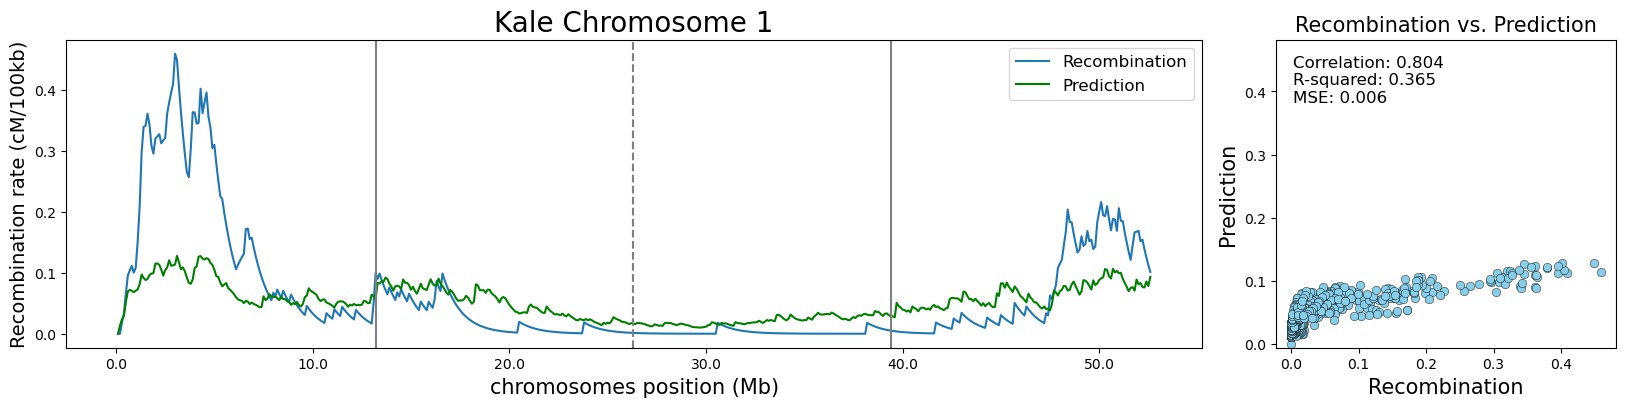

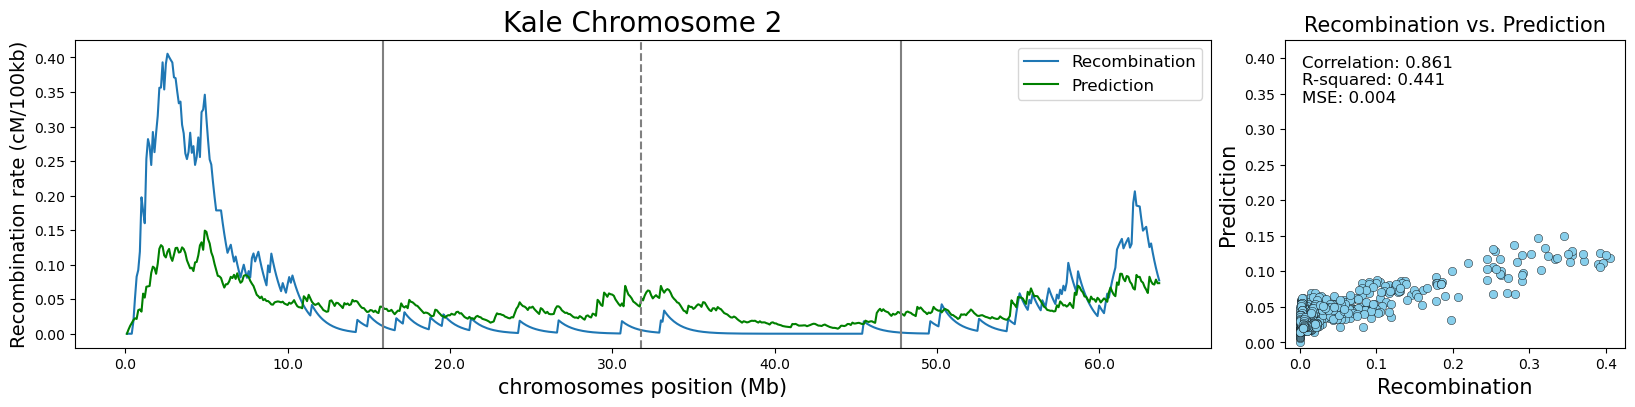

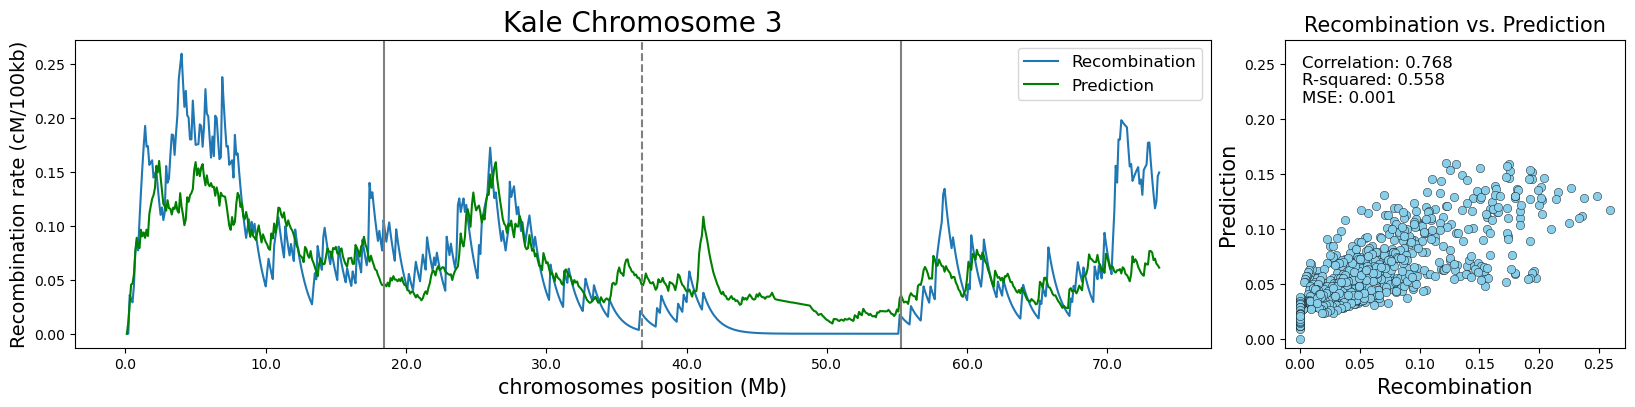

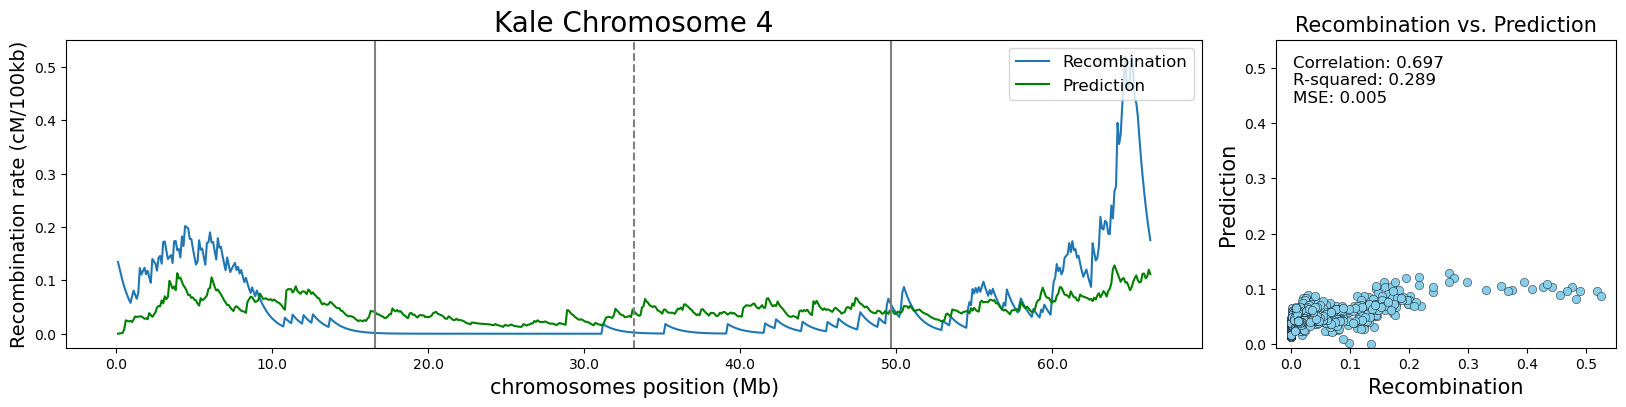

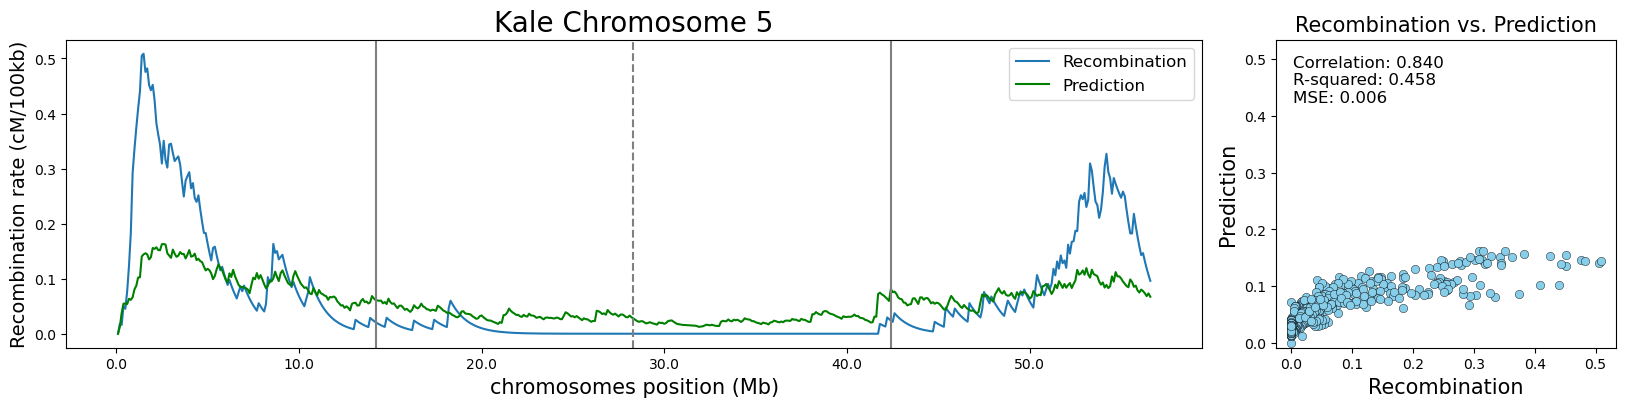

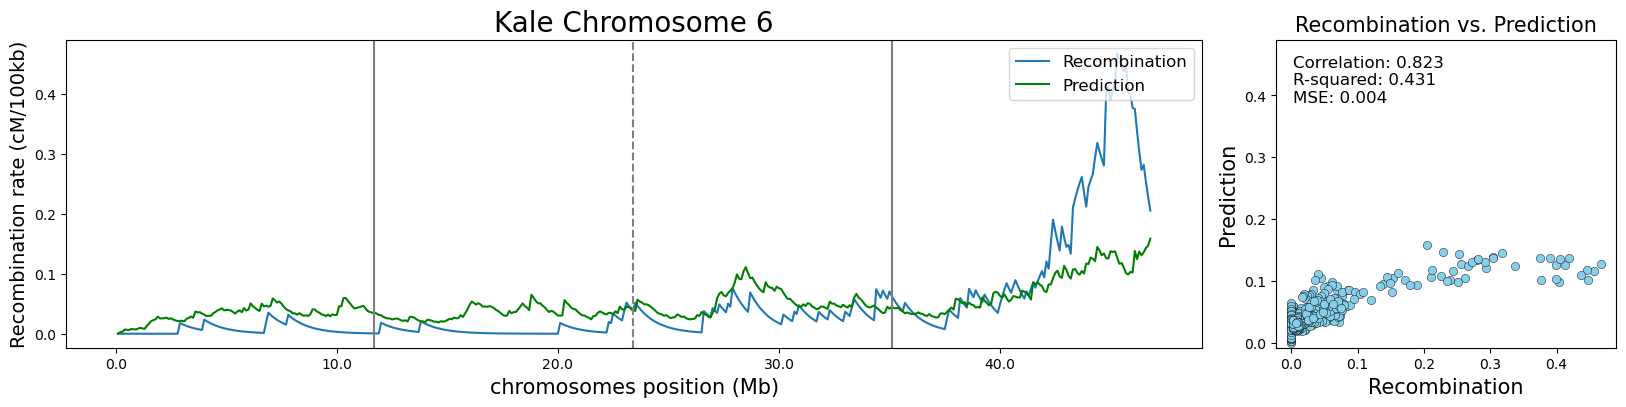

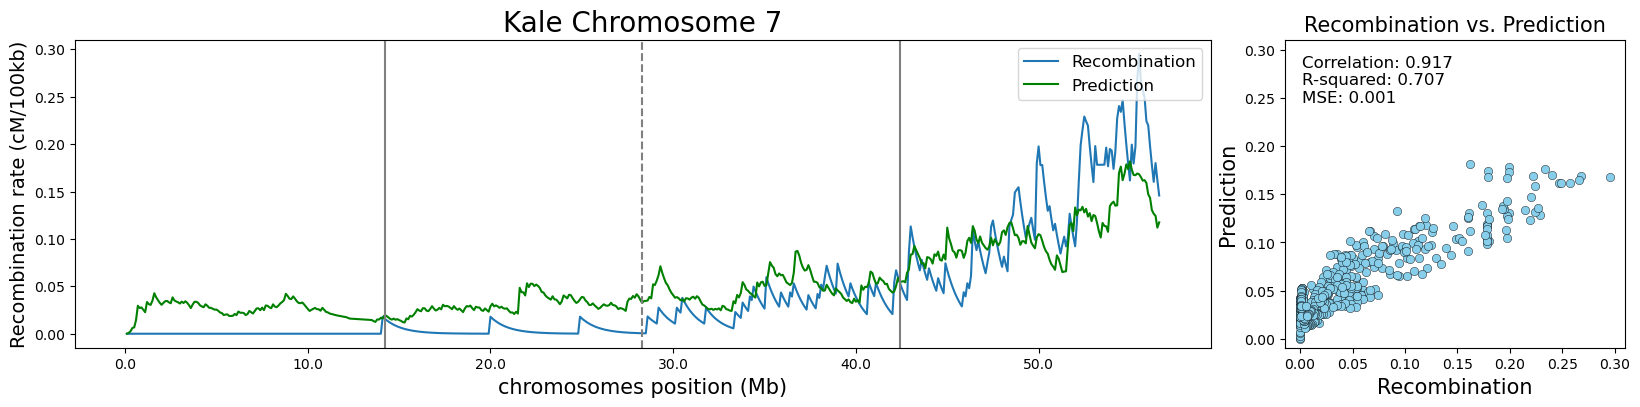

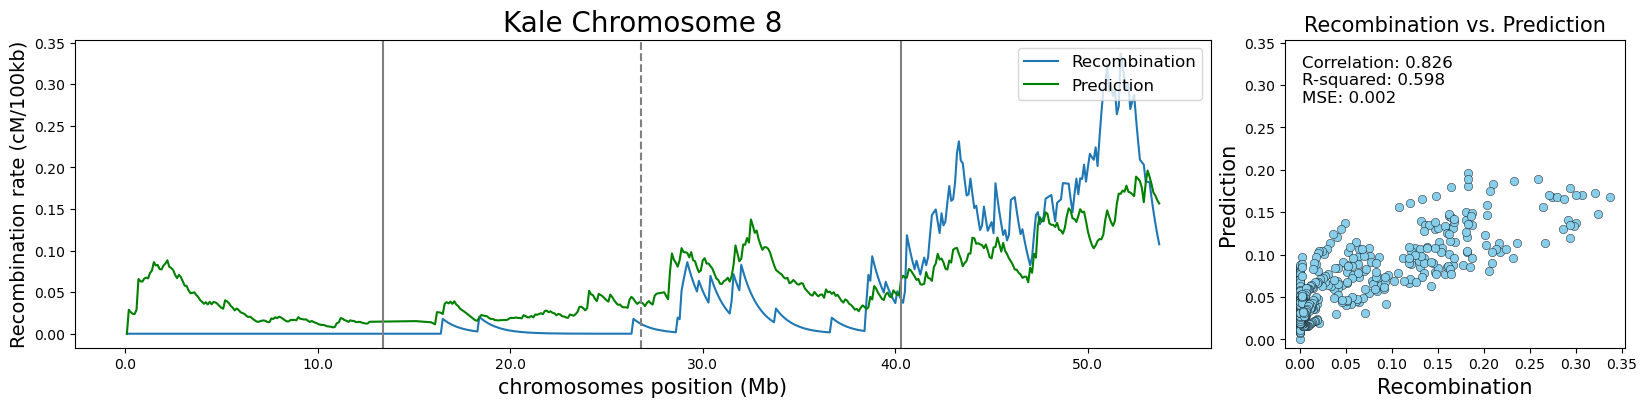

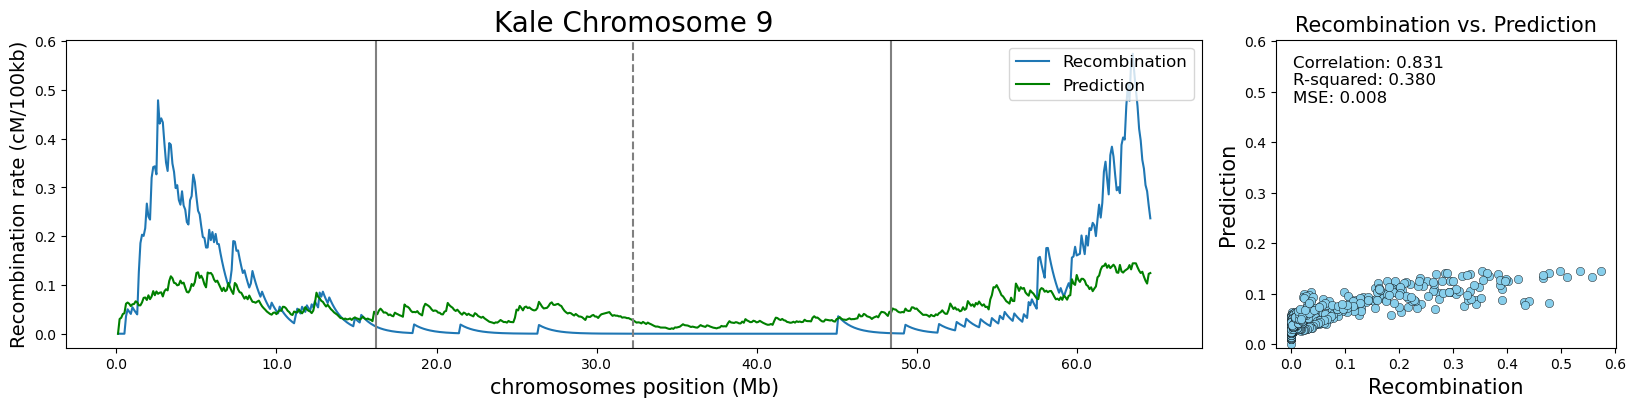

In [37]:
# Predictions and graphs for all chromosomes
for chr_number in range(1, 10):
    plot_chromosome_results(chr_number)
    plt.show()

# Data compilation

In [38]:
corr = pd.DataFrame({'corr':[corr_chr1, corr_chr2, corr_chr3, corr_chr4, corr_chr5, corr_chr6,corr_chr7,corr_chr8,corr_chr9,]})
r2 = pd.DataFrame({'R^2':[r2_chr1, r2_chr2, r2_chr3, r2_chr4, r2_chr5, r2_chr6, r2_chr7, r2_chr8, r2_chr9]})
mse = pd.DataFrame({'MSE':[mse_chr1, mse_chr2, mse_chr3, mse_chr4, mse_chr5, mse_chr6, mse_chr7, mse_chr8, mse_chr9]})
index = pd.DataFrame({'chr':['chr1','chr2','chr3','chr4','chr5','chr6','chr7','chr8','chr9',]})
tw_pk_table = pd.concat([index, corr, r2, mse], axis=1)
tw_pk_table

chr      corr       R^2       MSE
0  chr1  0.804159  0.365121  0.005948
1  chr2  0.860719  0.440548  0.003741
2  chr3  0.768438  0.558115  0.001394
3  chr4  0.697008  0.288532  0.005080
4  chr5  0.840108  0.457559  0.005716
5  chr6  0.823448  0.431337  0.004385
6  chr7  0.916921  0.706790  0.001090
7  chr8  0.826270  0.598128  0.002493
8  chr9  0.830526  0.379613  0.007732

Correlation between model predictions and recombination rates by quartiles

In [39]:
corr_q1 = pd.DataFrame({'Q1':[corr_q1_chr1,corr_q1_chr2,corr_q1_chr3,corr_q1_chr4,corr_q1_chr5,corr_q1_chr6,corr_q1_chr7,corr_q1_chr8,corr_q1_chr9]})
corr_q2 = pd.DataFrame({'Q2':[corr_q2_chr1,corr_q2_chr2,corr_q2_chr3,corr_q2_chr4,corr_q2_chr5,corr_q2_chr6,corr_q2_chr7,corr_q2_chr8,corr_q2_chr9]})
corr_q3 = pd.DataFrame({'Q3':[corr_q3_chr1,corr_q3_chr2,corr_q3_chr3,corr_q3_chr4,corr_q3_chr5,corr_q3_chr6,corr_q3_chr7,corr_q3_chr8,corr_q3_chr9]})
corr_q4 = pd.DataFrame({'Q4':[corr_q4_chr1,corr_q4_chr2,corr_q4_chr3,corr_q4_chr4,corr_q4_chr5,corr_q4_chr6,corr_q4_chr7,corr_q4_chr8,corr_q4_chr9]})

index = pd.DataFrame({'chr':['chr1','chr2','chr3','chr4','chr5','chr6','chr7','chr8','chr9']})
q_corr = pd.concat([index, corr_q1, corr_q2, corr_q3, corr_q4], axis=1)
q_corr_styled = q_corr.style.background_gradient(cmap="PRGn", vmin=-1, vmax=1)
q_corr_styled.set_table_styles([{'selector': 'th',
                                'props': [('text-align', 'center')]}])
q_corr_styled 

# Four model comparison

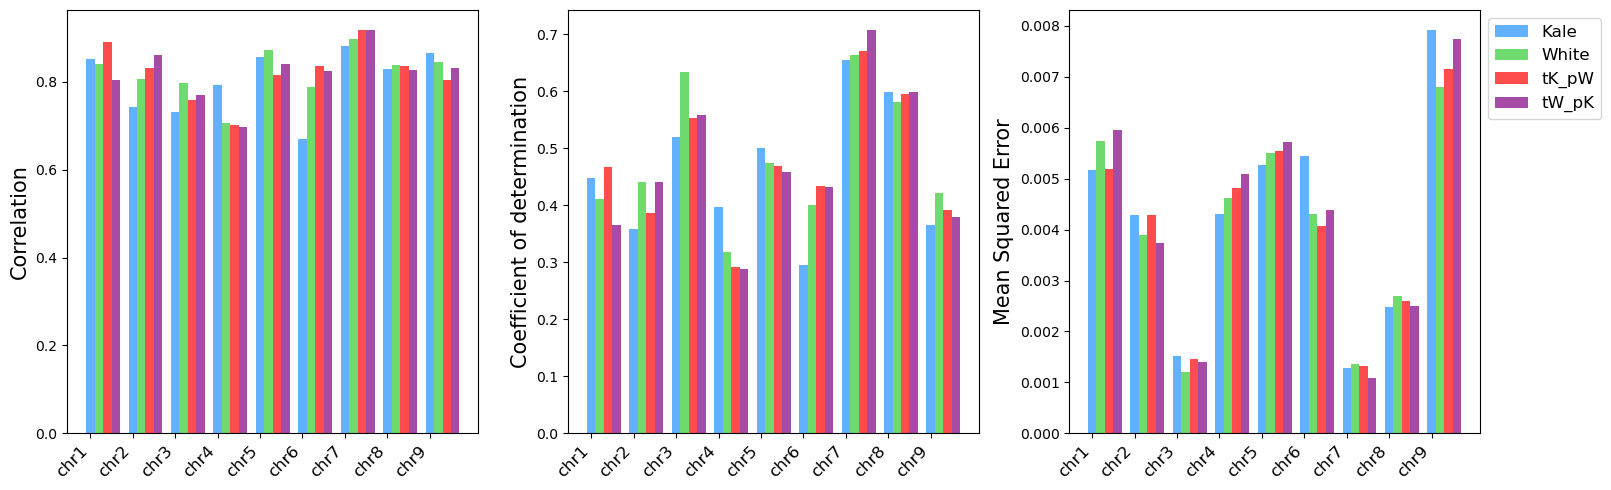

In [40]:
# Adjusting bar width
bar_width = 0.2

# Creating data positions
bar_positions_k = np.arange(len(k_table['chr']))
bar_positions_w = bar_positions_k + bar_width
bar_positions_tk_pw = bar_positions_w + bar_width
bar_positions_tw_pk = bar_positions_tk_pw + bar_width

# Creating subplots (1 row, 3 columns)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# First chart
axs[0].bar(bar_positions_k, k_table['corr'], color='dodgerblue', width=bar_width, label='Kale', alpha=0.7)
axs[0].bar(bar_positions_w, w_table['corr'], color='limegreen', width=bar_width, label='White', alpha=0.7)
axs[0].bar(bar_positions_tk_pw, tk_pw_table['corr'], color='red', width=bar_width, label='tK_pW', alpha=0.7)
axs[0].bar(bar_positions_tw_pk, tw_pk_table['corr'], color='purple', width=bar_width, label='tW_pK', alpha=0.7)

axs[0].set_ylabel('Correlation', fontsize=15)

# Second chart

axs[1].bar(bar_positions_k, k_table['R^2'], color='dodgerblue', width=bar_width, label='Kale', alpha=0.7)
axs[1].bar(bar_positions_w, w_table['R^2'], color='limegreen', width=bar_width, label='White', alpha=0.7)
axs[1].bar(bar_positions_tk_pw, tk_pw_table['R^2'], color='red', width=bar_width, label='tK_pW', alpha=0.7)
axs[1].bar(bar_positions_tw_pk, tw_pk_table['R^2'], color='purple', width=bar_width, label='tW_pK', alpha=0.7)

axs[1].set_ylabel('Coefficient of determination', fontsize=15)

# Third chart

axs[2].bar(bar_positions_k, k_table['MSE'], color='dodgerblue', width=bar_width, label='Kale', alpha=0.7)
axs[2].bar(bar_positions_w, w_table['MSE'], color='limegreen', width=bar_width, label='White', alpha=0.7)
axs[2].bar(bar_positions_tk_pw, tk_pw_table['MSE'], color='red', width=bar_width, label='tK_pW', alpha=0.7)
axs[2].bar(bar_positions_tw_pk, tw_pk_table['MSE'], color='purple', width=bar_width, label='tW_pK', alpha=0.7)

axs[2].set_ylabel('Mean Squared Error', fontsize=15)

# Get chromosome labels from the 'chr' column
chr_labels = k_table['chr']

# Set x-axis labels for all three subplots
for ax in axs:
    ax.set_xticks(bar_positions_k)
    ax.set_xticklabels(chr_labels)

# Rotate labels for better readability
for ax in axs:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)

# Adjusting layout
plt.tight_layout()

# Place legend outside the subplots and above the last subplot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

# Show the figure
plt.show()

# Model trained with information from Brassica crosses to predict recombination on each Kale chromosome

In [41]:
study.head(2)

cross reference   chr   start     end  srec  gene  mRNA  \
0  broccoli_cauliflower  broccoli  chr1       0  100000   0.0    22    22   
1  broccoli_cauliflower  broccoli  chr1  100000  200000   0.0    27    27   

   exon  CDS  
0    91   91  
1   135  135

In [42]:
all_info_without_kale = study[study['reference'] != 'kale' ]
all_info_without_kale

cross reference   chr     start       end      srec  \
0       broccoli_cauliflower  broccoli  chr1         0    100000  0.000000   
1       broccoli_cauliflower  broccoli  chr1    100000    200000  0.000000   
2       broccoli_cauliflower  broccoli  chr1    200000    300000  0.000000   
3       broccoli_cauliflower  broccoli  chr1    300000    400000  0.036497   
4       broccoli_cauliflower  broccoli  chr1    400000    500000  0.032847   
...                      ...       ...   ...       ...       ...       ...   
103831        white_kohlrabi  kohlrabi  chr9  64400000  64500000  0.189701   
103832        white_kohlrabi  kohlrabi  chr9  64500000  64600000  0.170731   
103833        white_kohlrabi  kohlrabi  chr9  64600000  64700000  0.153658   
103834        white_kohlrabi  kohlrabi  chr9  64700000  64800000  0.138292   
103835        white_kohlrabi  kohlrabi  chr9  64800000  64900000  0.124463   

        gene  mRNA  exon  CDS  
0         22    22    91   91  
1         27    27   135  135  
2         15    15    66   66  
3         26    26    87   87  
4         22    22    90   90  
...      ...   ...   ...  ...  
103831    13    13    76   76  
103832    16    16    77   77  
103833    22    22   112  112  
103834    11    11    49   49  
103835    16    16    77   77  

[82947 rows x 10 columns]

In [43]:
all_info_without_kale.reference.unique()

array(['broccoli', 'cauliflower', 'kohlrabi', 'white'], dtype=object)

In [44]:
# TRAINING MODEL WITH BRASSICA CROSSES
X_train = all_info_without_kale.drop(['cross', 'reference','chr','start','end','srec'], axis=1)
y_train = all_info_without_kale[['srec']]

model.fit(X_train, y_train)

ExtraTreesRegressor(random_state=1)

In [45]:
# Objects with Kale data per chromosome
chr1 = k[k['chr']== 'chr1']
chr2 = k[k['chr']== 'chr2']
chr3 = k[k['chr']== 'chr3']
chr4 = k[k['chr']== 'chr4']
chr5 = k[k['chr']== 'chr5']
chr6 = k[k['chr']== 'chr6']
chr7 = k[k['chr']== 'chr7']
chr8 = k[k['chr']== 'chr8']
chr9 = k[k['chr']== 'chr9']

In [46]:
def plot_chromosome_results(chr_number):
    # Replace  with 'chr{chr_number}' 
    chromosomes_data = globals()[f'achr{chr_number}']
    chr_data = globals()[f'chr{chr_number}']

    # MODEL PREDICTIONS
    model_preds = model.predict(chr_data.drop(['cross', 'reference','chr','start','end','srec'], axis=1))
    
    #SMOOTHING
    model_spreds= np.zeros(len(model_preds))

    for i in  range(1, len(model_preds)): 
        model_spreds[i] = model_preds[i-1]*0.1 + model_spreds[i-1]*0.9
        
    #CORRELATIONS BY QUARTILES
    c_q1 = int(len(chr_data)*0.25)
    c_q2 = int(len(chr_data)*0.50)
    c_q3 = int(len(chr_data)*0.75)
    
    rq1 = chr_data['srec'].iloc[0:c_q1]
    rq2 = chr_data['srec'].iloc[c_q1:c_q2]
    rq3 = chr_data['srec'].iloc[c_q2:c_q3]
    rq4 = chr_data['srec'].iloc[c_q3:int(len(chr_data))]

    pq1 = model_spreds[0:c_q1]
    pq2 = model_spreds[c_q1:c_q2]
    pq3 = model_spreds[c_q2:c_q3]
    pq4 = model_spreds[c_q3:int(len(chr_data))]

    corr_q1 = np.corrcoef(rq1, pq1)[0, 1]
    corr_q2 = np.corrcoef(rq2, pq2)[0, 1]
    corr_q3 = np.corrcoef(rq3, pq3)[0, 1]
    corr_q4 = np.corrcoef(rq4, pq4)[0, 1]
    
    globals()[f'corr_q1_chr{chr_number}'] = corr_q1
    globals()[f'corr_q2_chr{chr_number}'] = corr_q2
    globals()[f'corr_q3_chr{chr_number}'] = corr_q3
    globals()[f'corr_q4_chr{chr_number}'] = corr_q4
     
    # PLOTTING RESULTS
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4), gridspec_kw={'width_ratios': [10, 3]})

    # Line plot and correlation plot
    ax1.plot(chr_data.end, chr_data.srec, label='Recombination')
    ax1.plot(chr_data.end, model_spreds, label='Prediction', color='green')
    ax1.set_title(f'Kale Chromosome {chr_number}', fontsize=20)
    ax1.set_xlabel('chromosomes position (Mb)', fontsize=15)
    ax1.set_ylabel('Recombination rate (cM/100kb)', fontsize=14)
    ax1.legend(loc='upper right', fontsize=12)
    ticks = ax1.get_xticks() / 1000000
    ax1.set_xticklabels(ticks)
        
    chr_len = chr_data["end"].iloc[-1]
    q1 =round(chr_len * 0.25 / 100000) * 100000
    q2 =round(chr_len* 0.50 / 100000) * 100000
    q3 =round(chr_len * 0.75 / 100000) * 100000

    ax1.axvline(x=q1, color='gray', linestyle='-')
    ax1.axvline(x=q2, color='gray', linestyle='--')
    ax1.axvline(x=q3, color='gray', linestyle='-')

    # Scatter plot
    scatter = ax2.scatter(chr_data.srec, model_spreds, c='skyblue', edgecolors='black', linewidth= 0.3)
    ax2.set_title('Recombination vs. Prediction', fontsize=15)
    ax2.set_xlabel('Recombination', fontsize=15)
    ax2.set_ylabel('Prediction', fontsize=15)

    # Calculate correlation coefficient, coefficient of determination, and Mean Squared Error
    corr_chr = np.corrcoef(chr_data.srec, model_spreds)[0, 1]
    r2_chr = r2_score(chr_data.srec, model_spreds)
    mse_chr = mean_squared_error(chr_data.srec, model_spreds)

    # Calculate the aspect ratio based on the plot heights
    h1 = ax1.get_ylim()
    h2 = ax2.get_ylim()
    aspect_ratio = max(h1[1] - h1[0], h2[1] - h2[0]) / (max(h1[1], h2[1]) - min(h1[0], h2[0]))

    # Set the aspect ratio for the scatter plot only if it doesn't distort the square shape
    if aspect_ratio < 1:
        ax2.set_aspect('equal')

    # Display correlation coefficient, coefficient of determination, and Mean Squared Error as plain text
    globals()[f'corr_chr{chr_number}'] = corr_chr
    globals()[f'r2_chr{chr_number}'] = r2_chr
    globals()[f'mse_chr{chr_number}'] = mse_chr

    textstr = f'Correlation: {corr_chr:.3f}\nR-squared: {r2_chr:.3f}\nMSE: {mse_chr:.3f}'
    ax2.text(0.05, 0.95, textstr, transform=ax2.transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left')

    # Adjustments to align the heights of the two plots
    max_height = max(h1[1], h2[1])
    ax1.set_ylim([h1[0], max_height])
    ax2.set_ylim([h2[0], max_height])

    # Reduce the separation between the plots
    plt.subplots_adjust(wspace=0.1)
    plt.show()

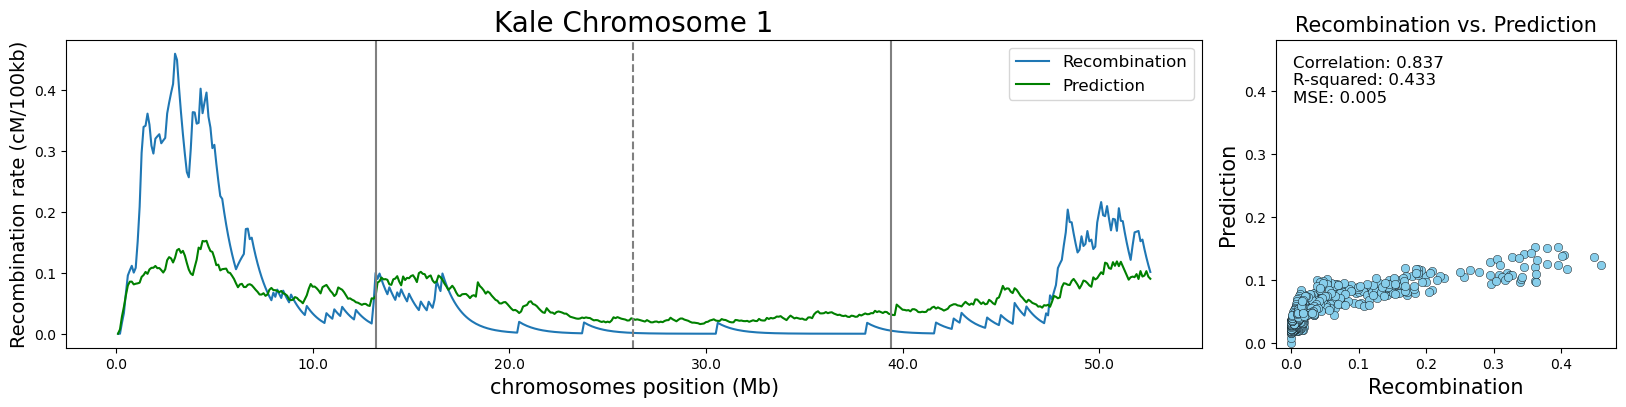

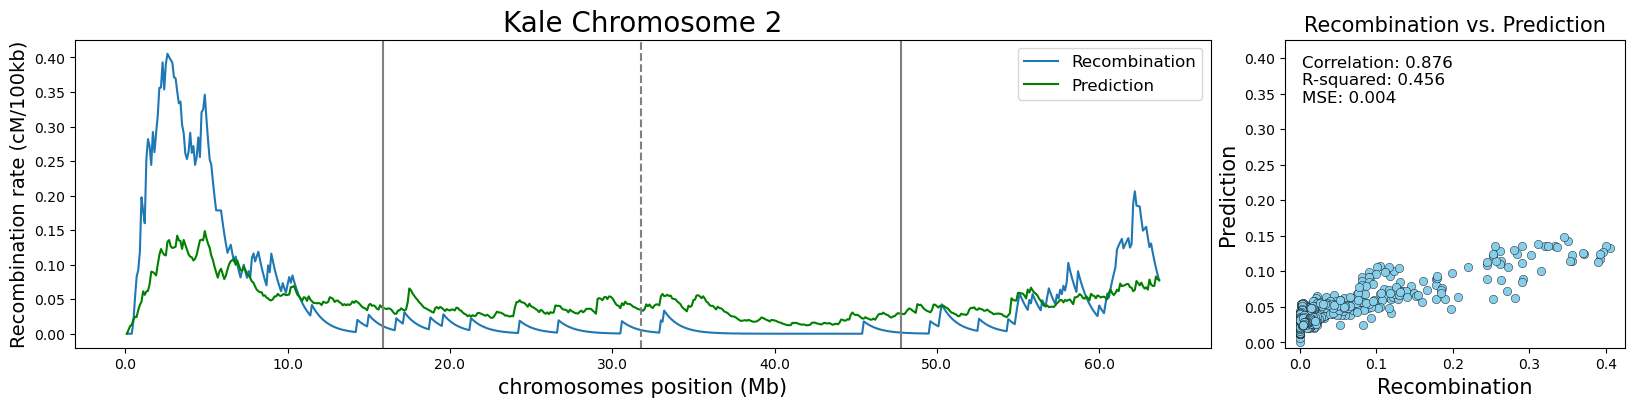

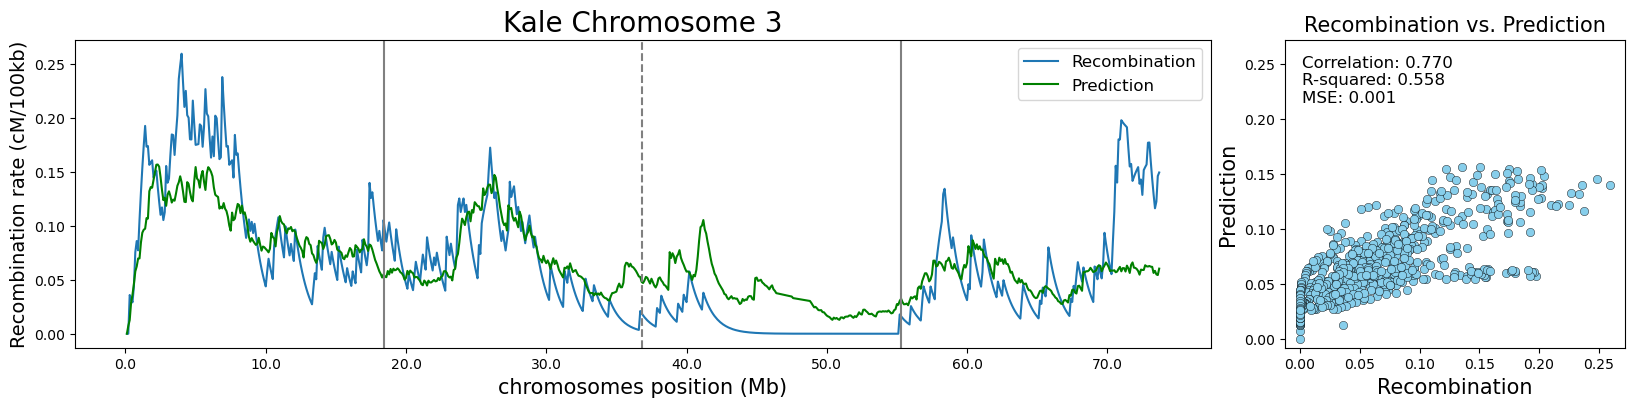

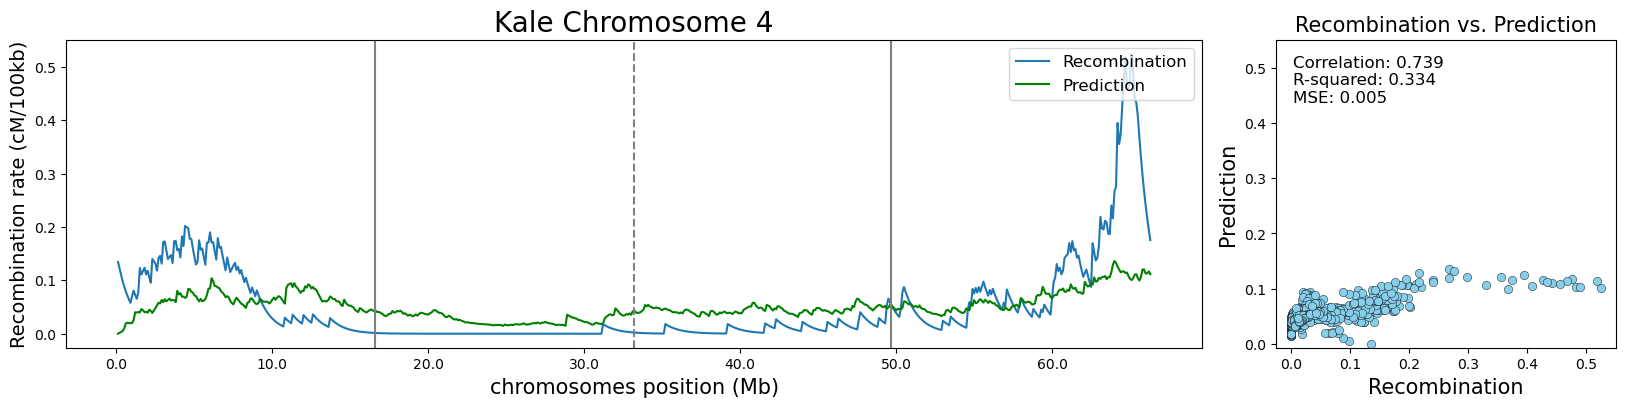

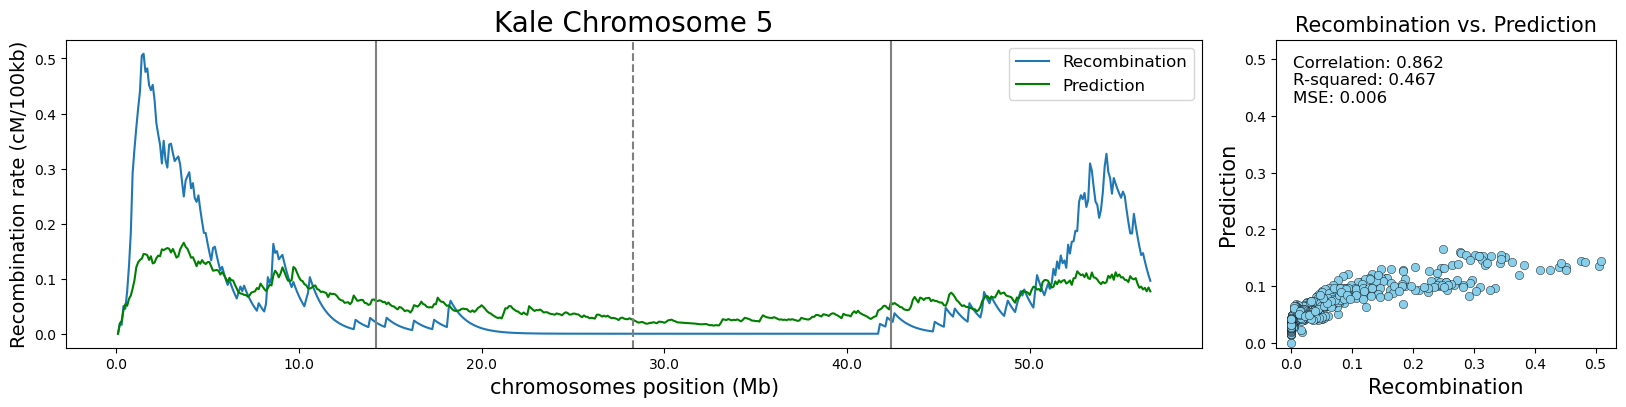

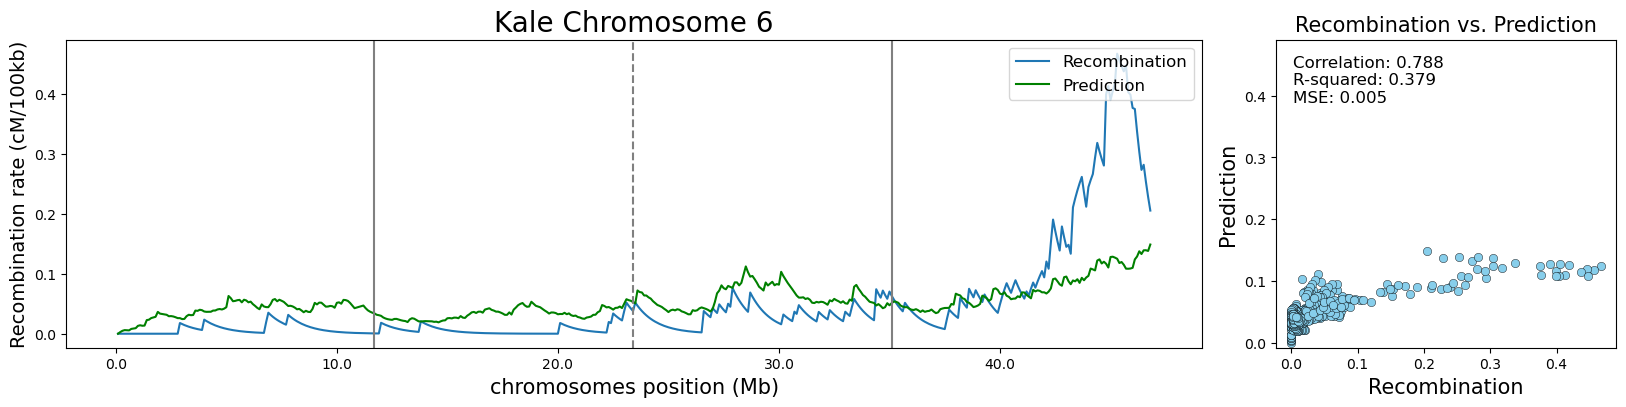

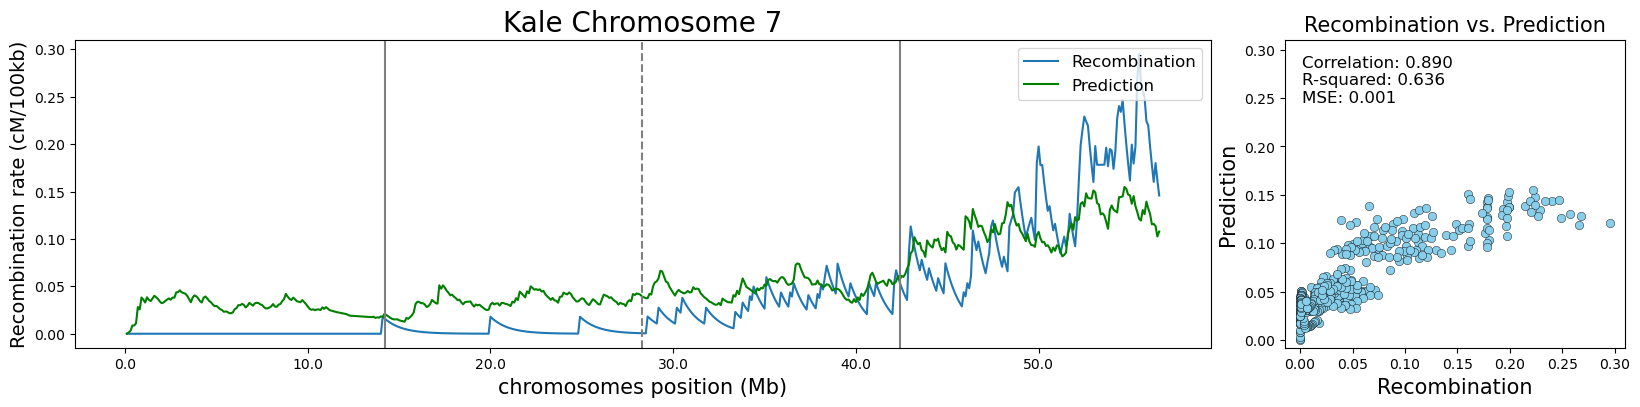

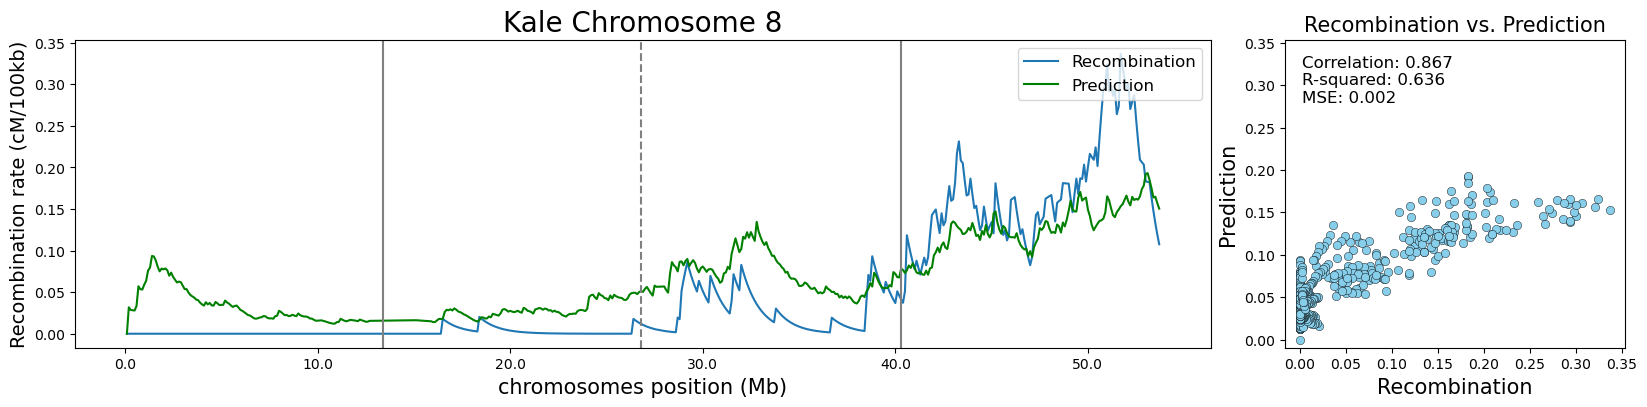

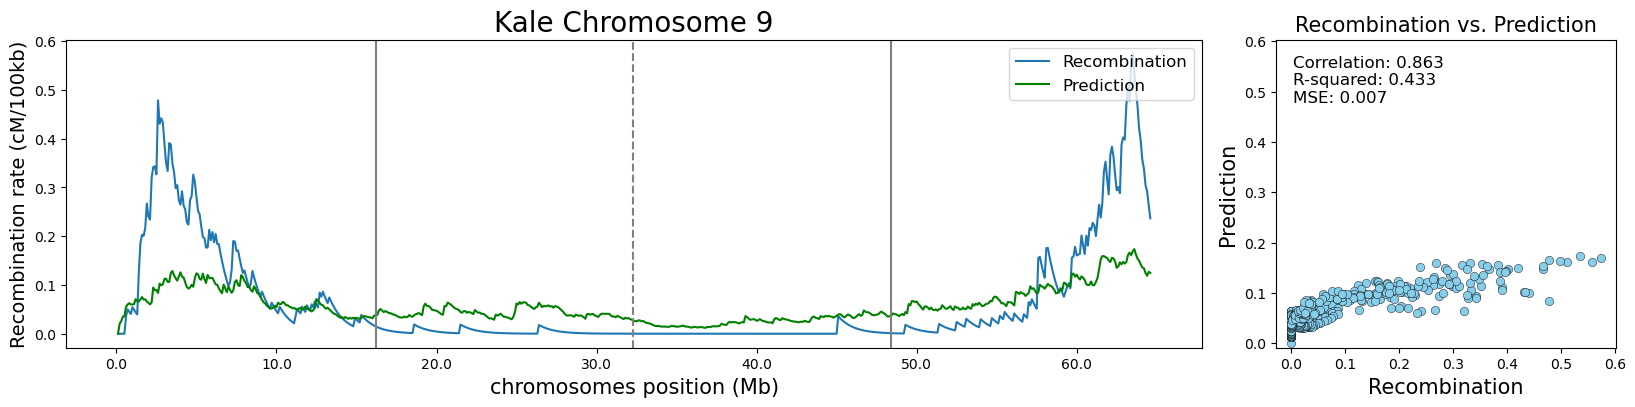

In [47]:
# Predictions and graphs for all chromosomes
for chr_number in range(1, 10):
    plot_chromosome_results(chr_number)
    plt.show()

# Data compilation

In [48]:
corr = pd.DataFrame({'corr':[corr_chr1, corr_chr2, corr_chr3, corr_chr4, corr_chr5, corr_chr6,corr_chr7,corr_chr8,corr_chr9,]})
r2 = pd.DataFrame({'R^2':[r2_chr1, r2_chr2, r2_chr3, r2_chr4, r2_chr5, r2_chr6, r2_chr7, r2_chr8, r2_chr9]})
mse = pd.DataFrame({'MSE':[mse_chr1, mse_chr2, mse_chr3, mse_chr4, mse_chr5, mse_chr6, mse_chr7, mse_chr8, mse_chr9]})
index = pd.DataFrame({'chr':['chr1','chr2','chr3','chr4','chr5','chr6','chr7','chr8','chr9',]})
ta_pk_table = pd.concat([index, corr, r2, mse], axis=1)
ta_pk_table

chr      corr       R^2       MSE
0  chr1  0.836519  0.433239  0.005310
1  chr2  0.875696  0.455908  0.003638
2  chr3  0.769556  0.557827  0.001395
3  chr4  0.739114  0.334355  0.004753
4  chr5  0.861971  0.466716  0.005619
5  chr6  0.787611  0.379379  0.004786
6  chr7  0.890451  0.636356  0.001352
7  chr8  0.866610  0.635525  0.002261
8  chr9  0.863220  0.432838  0.007069

In [49]:
corr_q1 = pd.DataFrame({'Q1':[corr_q1_chr1,corr_q1_chr2,corr_q1_chr3,corr_q1_chr4,corr_q1_chr5,corr_q1_chr6,corr_q1_chr7,corr_q1_chr8,corr_q1_chr9]})
corr_q2 = pd.DataFrame({'Q2':[corr_q2_chr1,corr_q2_chr2,corr_q2_chr3,corr_q2_chr4,corr_q2_chr5,corr_q2_chr6,corr_q2_chr7,corr_q2_chr8,corr_q2_chr9]})
corr_q3 = pd.DataFrame({'Q3':[corr_q3_chr1,corr_q3_chr2,corr_q3_chr3,corr_q3_chr4,corr_q3_chr5,corr_q3_chr6,corr_q3_chr7,corr_q3_chr8,corr_q3_chr9]})
corr_q4 = pd.DataFrame({'Q4':[corr_q4_chr1,corr_q4_chr2,corr_q4_chr3,corr_q4_chr4,corr_q4_chr5,corr_q4_chr6,corr_q4_chr7,corr_q4_chr8,corr_q4_chr9]})

index = pd.DataFrame({'chr':['chr1','chr2','chr3','chr4','chr5','chr6','chr7','chr8','chr9']})
q_corr = pd.concat([index, corr_q1, corr_q2, corr_q3, corr_q4], axis=1)
q_corr_styled = q_corr.style.background_gradient(cmap="PRGn", vmin=-1, vmax=1)
q_corr_styled.set_table_styles([{'selector': 'th',
                                'props': [('text-align', 'center')]}])
q_corr_styled 

# Model trained with information from Brassica crosses to predict recombination on each White chromosome

In [50]:
all_info_without_white = study[study['reference'] != 'white' ]
all_info_without_white

cross reference   chr     start       end      srec  \
0       broccoli_cauliflower  broccoli  chr1         0    100000  0.000000   
1       broccoli_cauliflower  broccoli  chr1    100000    200000  0.000000   
2       broccoli_cauliflower  broccoli  chr1    200000    300000  0.000000   
3       broccoli_cauliflower  broccoli  chr1    300000    400000  0.036497   
4       broccoli_cauliflower  broccoli  chr1    400000    500000  0.032847   
...                      ...       ...   ...       ...       ...       ...   
103831        white_kohlrabi  kohlrabi  chr9  64400000  64500000  0.189701   
103832        white_kohlrabi  kohlrabi  chr9  64500000  64600000  0.170731   
103833        white_kohlrabi  kohlrabi  chr9  64600000  64700000  0.153658   
103834        white_kohlrabi  kohlrabi  chr9  64700000  64800000  0.138292   
103835        white_kohlrabi  kohlrabi  chr9  64800000  64900000  0.124463   

        gene  mRNA  exon  CDS  
0         22    22    91   91  
1         27    27   135  135  
2         15    15    66   66  
3         26    26    87   87  
4         22    22    90   90  
...      ...   ...   ...  ...  
103831    13    13    76   76  
103832    16    16    77   77  
103833    22    22   112  112  
103834    11    11    49   49  
103835    16    16    77   77  

[82954 rows x 10 columns]

In [51]:
all_info_without_white.reference.unique()

array(['broccoli', 'cauliflower', 'kohlrabi', 'kale'], dtype=object)

In [52]:
# TRAINING MODEL WITH BRASSICA CROSSES
X_train = all_info_without_white.drop(['cross', 'reference','chr','start','end','srec'], axis=1)
y_train = all_info_without_white[['srec']]

model.fit(X_train, y_train)

ExtraTreesRegressor(random_state=1)

In [53]:
# Objects with White data per chromosome
chr1 = w[w['chr']== 'chr1']
chr2 = w[w['chr']== 'chr3']
chr4 = w[w['chr']== 'chr4']
chr5 = w[w['chr']== 'chr5']
chr6 = w[w['chr']== 'chr6']
chr7 = w[w['chr']== 'chr7']
chr8 = w[w['chr']== 'chr8']
chr9 = w[w['chr']== 'chr9']

In [54]:
def plot_chromosome_results(chr_number):
    # Replace  with 'chr{chr_number}' 
    chromosomes_data = globals()[f'achr{chr_number}']
    chr_data = globals()[f'chr{chr_number}']

    # MODEL PREDICTIONS
    model_preds = model.predict(chr_data.drop(['cross', 'reference','chr','start','end','srec'], axis=1))
    
    #SMOOTHING
    model_spreds= np.zeros(len(model_preds))

    for i in  range(1, len(model_preds)): 
        model_spreds[i] = model_preds[i-1]*0.1 + model_spreds[i-1]*0.9
        
    #CORRELATIONS BY QUARTILES
    c_q1 = int(len(chr_data)*0.25)
    c_q2 = int(len(chr_data)*0.50)
    c_q3 = int(len(chr_data)*0.75)
    
    rq1 = chr_data['srec'].iloc[0:c_q1]
    rq2 = chr_data['srec'].iloc[c_q1:c_q2]
    rq3 = chr_data['srec'].iloc[c_q2:c_q3]
    rq4 = chr_data['srec'].iloc[c_q3:int(len(chr_data))]

    pq1 = model_spreds[0:c_q1]
    pq2 = model_spreds[c_q1:c_q2]
    pq3 = model_spreds[c_q2:c_q3]
    pq4 = model_spreds[c_q3:int(len(chr_data))]

    corr_q1 = np.corrcoef(rq1, pq1)[0, 1]
    corr_q2 = np.corrcoef(rq2, pq2)[0, 1]
    corr_q3 = np.corrcoef(rq3, pq3)[0, 1]
    corr_q4 = np.corrcoef(rq4, pq4)[0, 1]
    
    globals()[f'corr_q1_chr{chr_number}'] = corr_q1
    globals()[f'corr_q2_chr{chr_number}'] = corr_q2
    globals()[f'corr_q3_chr{chr_number}'] = corr_q3
    globals()[f'corr_q4_chr{chr_number}'] = corr_q4
     
    # PLOTTING RESULTS
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4), gridspec_kw={'width_ratios': [10, 3]})

    # Line plot and correlation plot
    ax1.plot(chr_data.end, chr_data.srec, label='Recombination')
    ax1.plot(chr_data.end, model_spreds, label='Prediction', color='green')
    ax1.set_title(f'White Chromosome {chr_number}', fontsize=20)
    ax1.set_xlabel('chromosomes position (Mb)', fontsize=15)
    ax1.set_ylabel('Recombination rate (cM/100kb)', fontsize=14)
    ax1.legend(loc='upper right', fontsize=12)
    ticks = ax1.get_xticks() / 1000000
    ax1.set_xticklabels(ticks)
        
    chr_len = chr_data["end"].iloc[-1]
    q1 =round(chr_len * 0.25 / 100000) * 100000
    q2 =round(chr_len* 0.50 / 100000) * 100000
    q3 =round(chr_len * 0.75 / 100000) * 100000

    ax1.axvline(x=q1, color='gray', linestyle='-')
    ax1.axvline(x=q2, color='gray', linestyle='--')
    ax1.axvline(x=q3, color='gray', linestyle='-')

    # Scatter plot
    scatter = ax2.scatter(chr_data.srec, model_spreds, c='skyblue', edgecolors='black', linewidth= 0.3)
    ax2.set_title('Recombination vs. Prediction', fontsize=15)
    ax2.set_xlabel('Recombination', fontsize=15)
    ax2.set_ylabel('Prediction', fontsize=15)

    # Calculate correlation coefficient, coefficient of determination, and Mean Squared Error
    corr_chr = np.corrcoef(chr_data.srec, model_spreds)[0, 1]
    r2_chr = r2_score(chr_data.srec, model_spreds)
    mse_chr = mean_squared_error(chr_data.srec, model_spreds)

    # Calculate the aspect ratio based on the plot heights
    h1 = ax1.get_ylim()
    h2 = ax2.get_ylim()
    aspect_ratio = max(h1[1] - h1[0], h2[1] - h2[0]) / (max(h1[1], h2[1]) - min(h1[0], h2[0]))

    # Set the aspect ratio for the scatter plot only if it doesn't distort the square shape
    if aspect_ratio < 1:
        ax2.set_aspect('equal')

    # Display correlation coefficient, coefficient of determination, and Mean Squared Error as plain text
    globals()[f'corr_chr{chr_number}'] = corr_chr
    globals()[f'r2_chr{chr_number}'] = r2_chr
    globals()[f'mse_chr{chr_number}'] = mse_chr

    textstr = f'Correlation: {corr_chr:.3f}\nR-squared: {r2_chr:.3f}\nMSE: {mse_chr:.3f}'
    ax2.text(0.05, 0.95, textstr, transform=ax2.transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left')

    # Adjustments to align the heights of the two plots
    max_height = max(h1[1], h2[1])
    ax1.set_ylim([h1[0], max_height])
    ax2.set_ylim([h2[0], max_height])

    # Reduce the separation between the plots
    plt.subplots_adjust(wspace=0.1)
    plt.show()

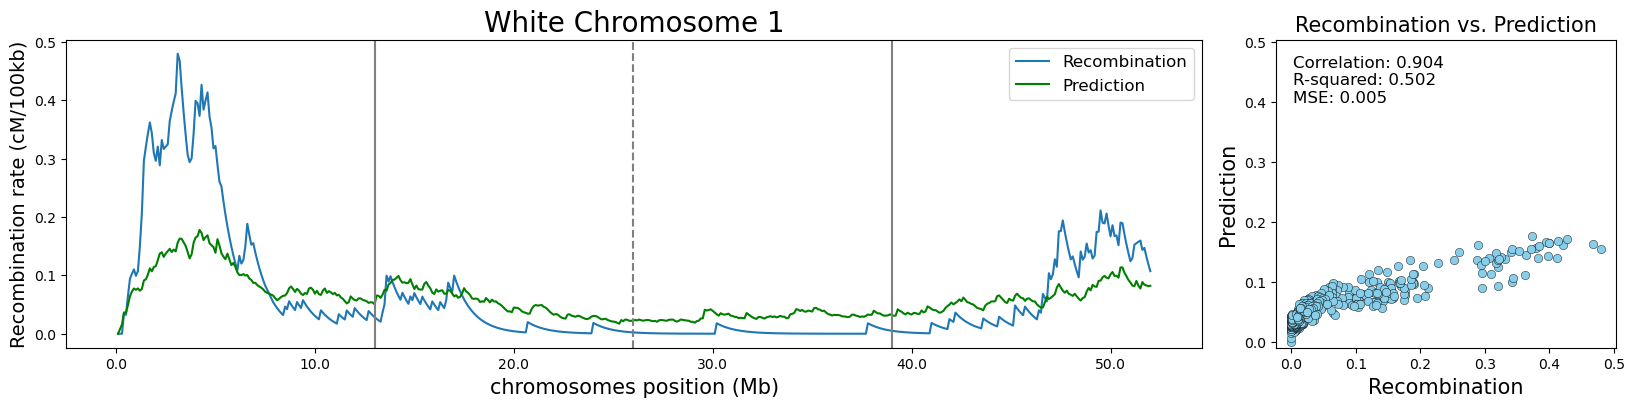

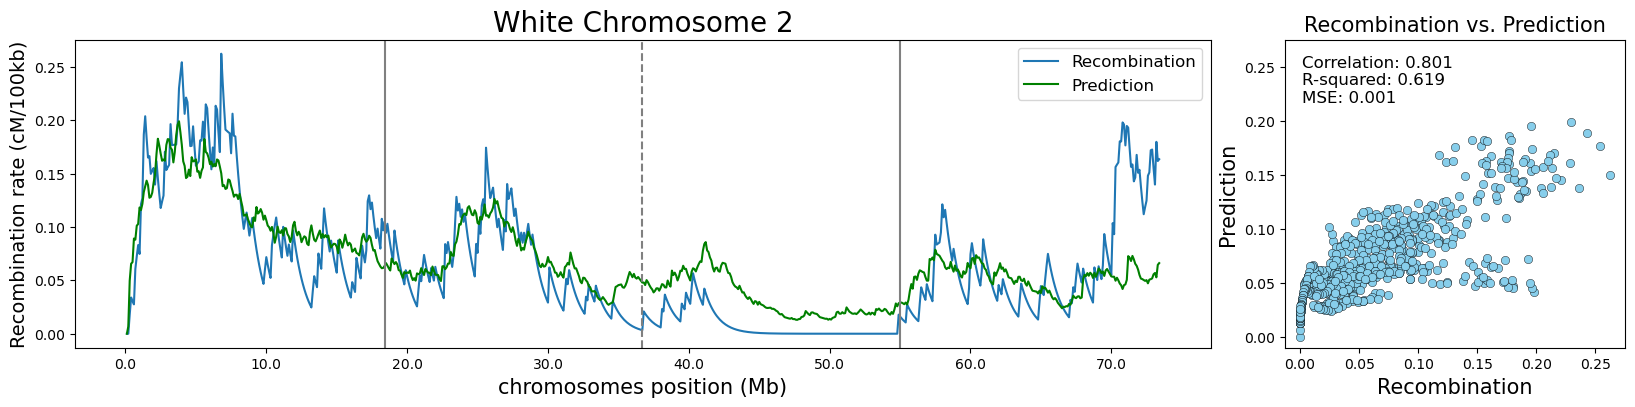

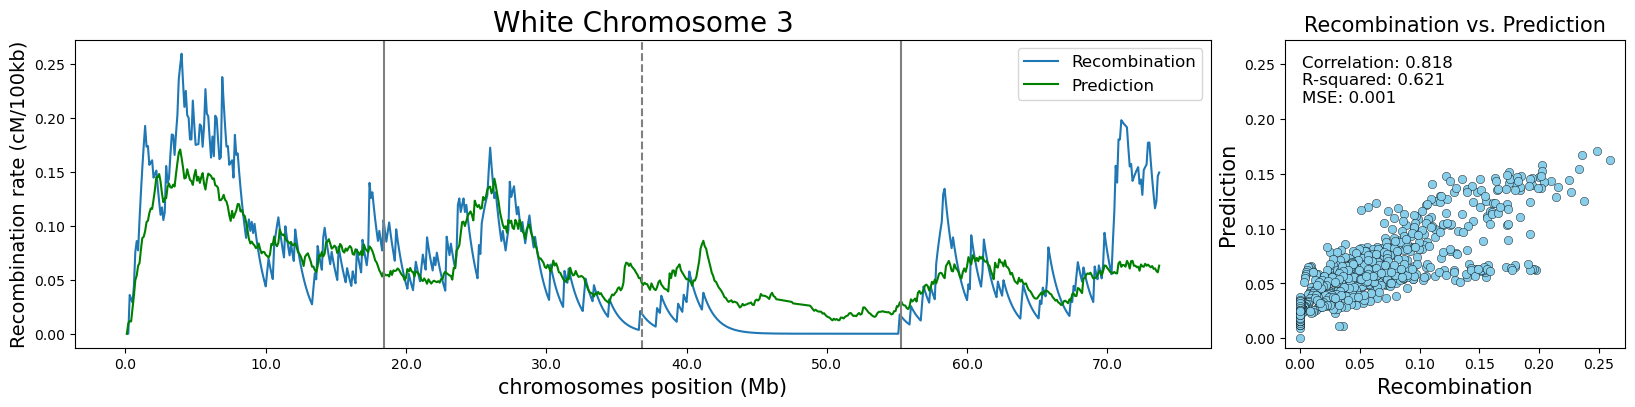

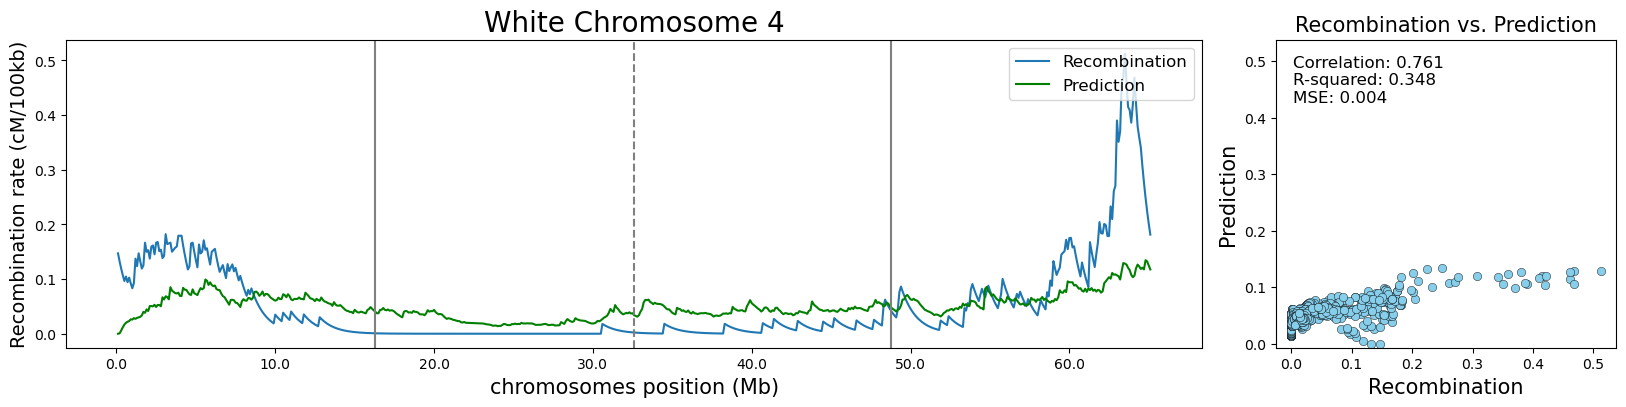

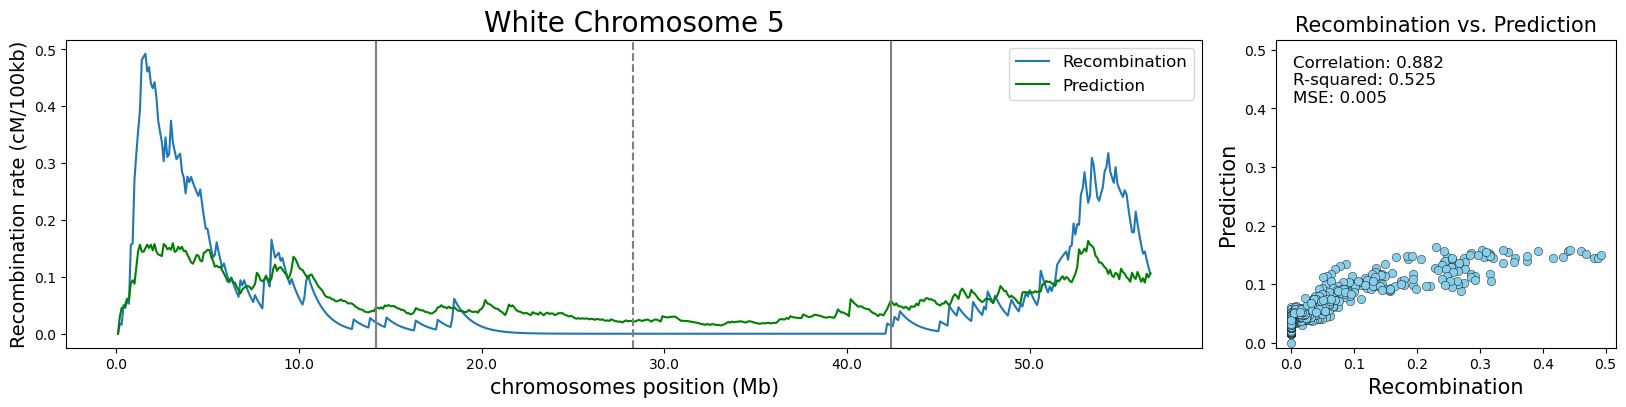

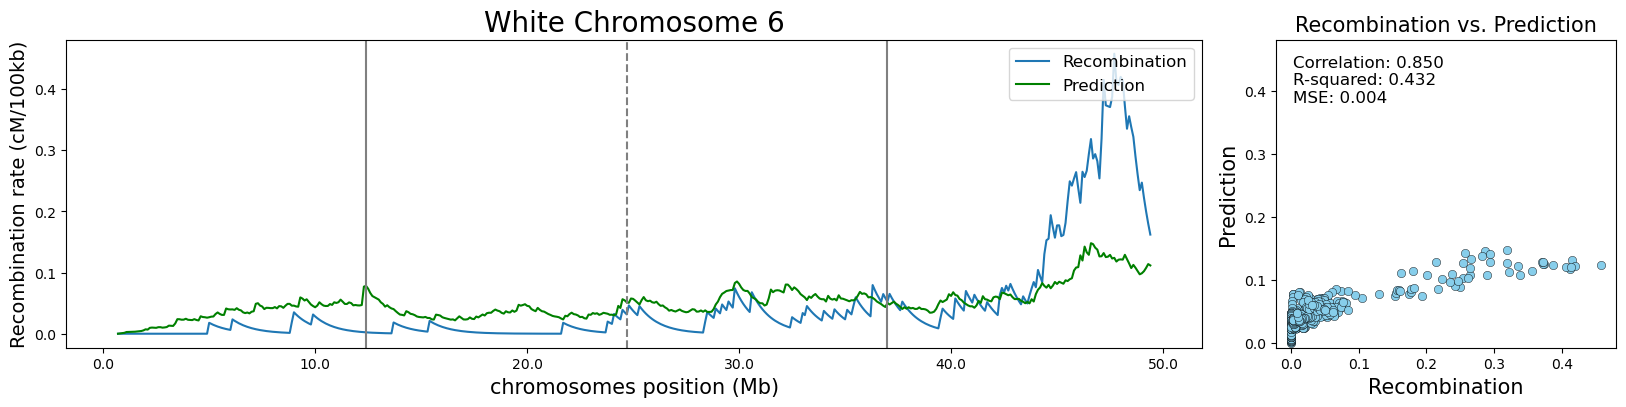

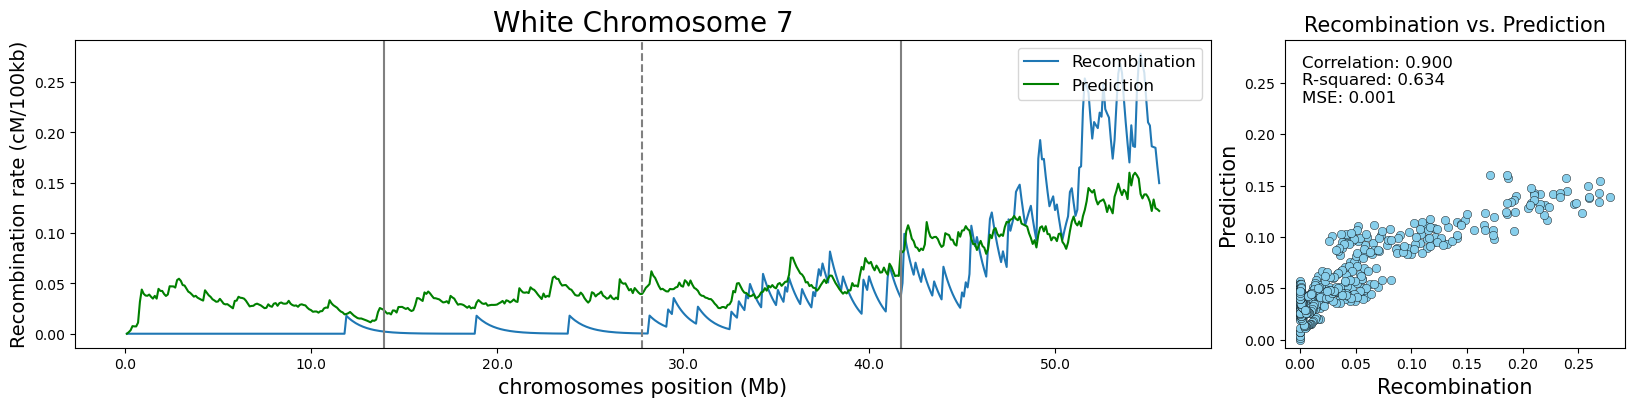

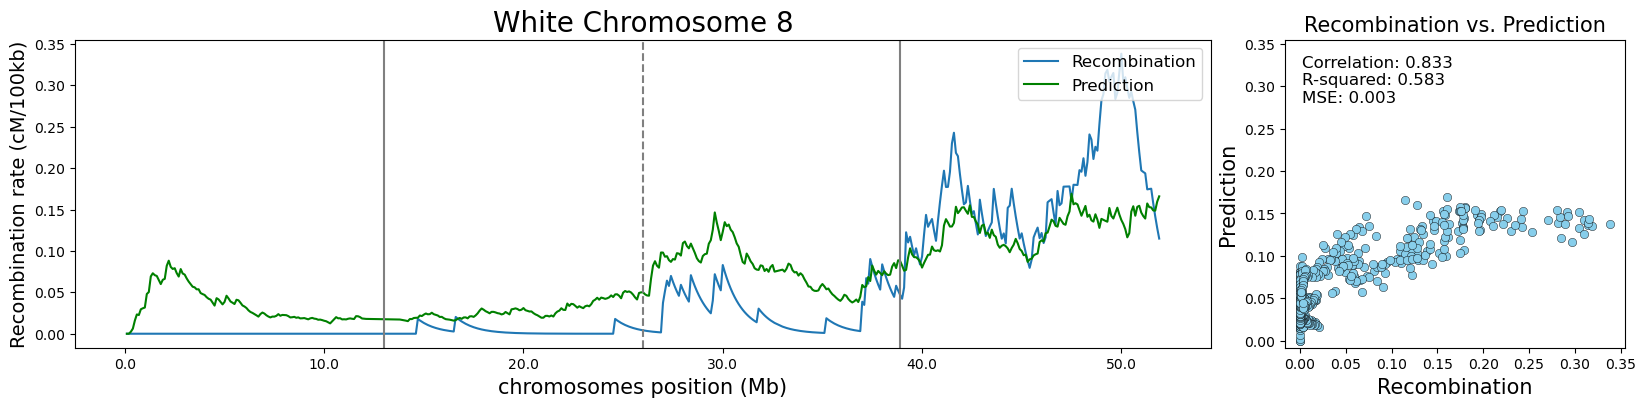

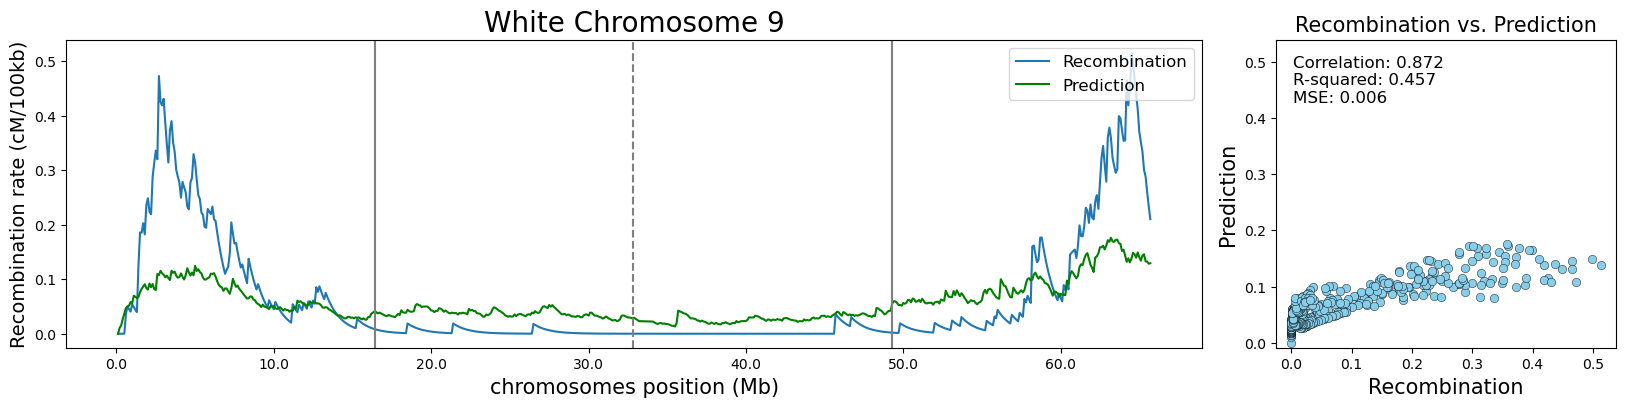

In [55]:
# Predictions and graphs for all chromosomes
for chr_number in range(1, 10):
    plot_chromosome_results(chr_number)
    plt.show()

# Data compilation

In [56]:
corr = pd.DataFrame({'corr':[corr_chr1, corr_chr2, corr_chr3, corr_chr4, corr_chr5, corr_chr6,corr_chr7,corr_chr8,corr_chr9,]})
r2 = pd.DataFrame({'R^2':[r2_chr1, r2_chr2, r2_chr3, r2_chr4, r2_chr5, r2_chr6, r2_chr7, r2_chr8, r2_chr9]})
mse = pd.DataFrame({'MSE':[mse_chr1, mse_chr2, mse_chr3, mse_chr4, mse_chr5, mse_chr6, mse_chr7, mse_chr8, mse_chr9]})
index = pd.DataFrame({'chr':['chr1','chr2','chr3','chr4','chr5','chr6','chr7','chr8','chr9',]})
ta_pw_table = pd.concat([index, corr, r2, mse], axis=1)
ta_pw_table

chr      corr       R^2       MSE
0  chr1  0.903551  0.501825  0.004847
1  chr2  0.800523  0.619330  0.001244
2  chr3  0.817977  0.620881  0.001196
3  chr4  0.760771  0.347574  0.004426
4  chr5  0.882137  0.524999  0.004957
5  chr6  0.849528  0.431922  0.004088
6  chr7  0.900136  0.633573  0.001473
7  chr8  0.832551  0.582994  0.002680
8  chr9  0.871546  0.457196  0.006375

In [57]:
ta_pk_table

chr      corr       R^2       MSE
0  chr1  0.836519  0.433239  0.005310
1  chr2  0.875696  0.455908  0.003638
2  chr3  0.769556  0.557827  0.001395
3  chr4  0.739114  0.334355  0.004753
4  chr5  0.861971  0.466716  0.005619
5  chr6  0.787611  0.379379  0.004786
6  chr7  0.890451  0.636356  0.001352
7  chr8  0.866610  0.635525  0.002261
8  chr9  0.863220  0.432838  0.007069

In [58]:
corr_q1 = pd.DataFrame({'Q1':[corr_q1_chr1,corr_q1_chr2,corr_q1_chr3,corr_q1_chr4,corr_q1_chr5,corr_q1_chr6,corr_q1_chr7,corr_q1_chr8,corr_q1_chr9]})
corr_q2 = pd.DataFrame({'Q2':[corr_q2_chr1,corr_q2_chr2,corr_q2_chr3,corr_q2_chr4,corr_q2_chr5,corr_q2_chr6,corr_q2_chr7,corr_q2_chr8,corr_q2_chr9]})
corr_q3 = pd.DataFrame({'Q3':[corr_q3_chr1,corr_q3_chr2,corr_q3_chr3,corr_q3_chr4,corr_q3_chr5,corr_q3_chr6,corr_q3_chr7,corr_q3_chr8,corr_q3_chr9]})
corr_q4 = pd.DataFrame({'Q4':[corr_q4_chr1,corr_q4_chr2,corr_q4_chr3,corr_q4_chr4,corr_q4_chr5,corr_q4_chr6,corr_q4_chr7,corr_q4_chr8,corr_q4_chr9]})

index = pd.DataFrame({'chr':['chr1','chr2','chr3','chr4','chr5','chr6','chr7','chr8','chr9']})
q_corr = pd.concat([index, corr_q1, corr_q2, corr_q3, corr_q4], axis=1)
q_corr_styled = q_corr.style.background_gradient(cmap="PRGn", vmin=-1, vmax=1)
q_corr_styled.set_table_styles([{'selector': 'th',
                                'props': [('text-align', 'center')]}])
q_corr_styled 

# Comparison of the six models

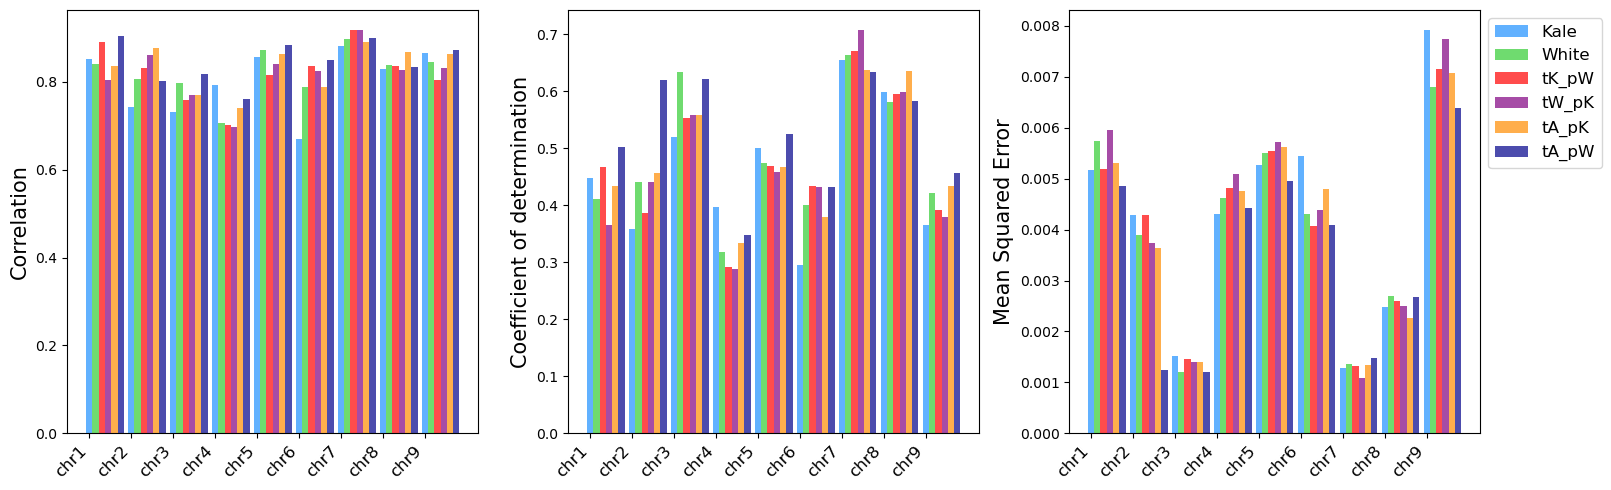

In [59]:
# Adjusting bar width
bar_width = 0.15

# Creating data positions
bar_positions_k = np.arange(len(k_table['chr']))
bar_positions_w = bar_positions_k + bar_width
bar_positions_tk_pw = bar_positions_w + bar_width
bar_positions_tw_pk = bar_positions_tk_pw + bar_width
bar_positions_ta_pk = bar_positions_tw_pk + bar_width
bar_positions_ta_pw = bar_positions_ta_pk + bar_width

# Creating subplots (1 row, 3 columns)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# First chart
axs[0].bar(bar_positions_k, k_table['corr'], color='dodgerblue', width=bar_width, label='Kale', alpha=0.7)
axs[0].bar(bar_positions_w, w_table['corr'], color='limegreen', width=bar_width, label='White', alpha=0.7)
axs[0].bar(bar_positions_tk_pw, tk_pw_table['corr'], color='red', width=bar_width, label='tK_pW', alpha=0.7)
axs[0].bar(bar_positions_tw_pk, tw_pk_table['corr'], color='purple', width=bar_width, label='tW_pK', alpha=0.7)
axs[0].bar(bar_positions_ta_pk, ta_pk_table['corr'], color='darkorange', width=bar_width, label='tA_pK', alpha=0.7)
axs[0].bar(bar_positions_ta_pw, ta_pw_table['corr'], color='darkblue', width=bar_width, label='tA_pW', alpha=0.7)

axs[0].set_ylabel('Correlation', fontsize=15)

# Second chart
axs[1].bar(bar_positions_k, k_table['R^2'], color='dodgerblue', width=bar_width, label='Kale', alpha=0.7)
axs[1].bar(bar_positions_w, w_table['R^2'], color='limegreen', width=bar_width, label='White', alpha=0.7)
axs[1].bar(bar_positions_tk_pw, tk_pw_table['R^2'], color='red', width=bar_width, label='tK_pW', alpha=0.7)
axs[1].bar(bar_positions_tw_pk, tw_pk_table['R^2'], color='purple', width=bar_width, label='tW_pK', alpha=0.7)
axs[1].bar(bar_positions_ta_pk, ta_pk_table['R^2'], color='darkorange', width=bar_width, label='tA_pK', alpha=0.7)
axs[1].bar(bar_positions_ta_pw, ta_pw_table['R^2'], color='darkblue', width=bar_width, label='tA_pW', alpha=0.7)

axs[1].set_ylabel('Coefficient of determination', fontsize=15)

# Third chart

axs[2].bar(bar_positions_k, k_table['MSE'], color='dodgerblue', width=bar_width, label='Kale', alpha=0.7)
axs[2].bar(bar_positions_w, w_table['MSE'], color='limegreen', width=bar_width, label='White', alpha=0.7)
axs[2].bar(bar_positions_tk_pw, tk_pw_table['MSE'], color='red', width=bar_width, label='tK_pW', alpha=0.7)
axs[2].bar(bar_positions_tw_pk, tw_pk_table['MSE'], color='purple', width=bar_width, label='tW_pK', alpha=0.7)
axs[2].bar(bar_positions_ta_pk, ta_pk_table['MSE'], color='darkorange', width=bar_width, label='tA_pK', alpha=0.7)
axs[2].bar(bar_positions_ta_pw, ta_pw_table['MSE'], color='darkblue', width=bar_width, label='tA_pW', alpha=0.7)

axs[2].set_ylabel('Mean Squared Error', fontsize=15)

# Get chromosome labels from the 'chr' column
chr_labels = k_table['chr']

# Set x-axis labels for all three subplots
for ax in axs:
    ax.set_xticks(bar_positions_k)
    ax.set_xticklabels(chr_labels)

# Rotate labels for better readability
for ax in axs:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)

# Adjusting layout
plt.tight_layout()

# Place legend outside the subplots and above the last subplot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)

# Show the figure
plt.show()

In [60]:
summary = {'Training_set': ['Kale', 'White', 'Kale', 'White', 'All_except_Kale', 'All_except_White'],
           'Testing_set': ['Kale', 'White', 'White', 'Kale', 'Kale', 'White', ],
           'corr': [k_table.describe().iloc[1,0].round(3), w_table.describe().iloc[1,0].round(3), tk_pw_table.describe().iloc[1,0].round(3), tw_pk_table.describe().iloc[1,0].round(3), ta_pk_table.describe().iloc[1,0].round(3), ta_pw_table.describe().iloc[1,0].round(3)],
           'R^2': [k_table.describe().iloc[1,1].round(3), w_table.describe().iloc[1,1].round(3), tk_pw_table.describe().iloc[1,1].round(3), tw_pk_table.describe().iloc[1,1].round(3), ta_pk_table.describe().iloc[1,1].round(3), ta_pw_table.describe().iloc[1,1].round(3)],
           'MSE': [k_table.describe().iloc[1,2].round(3), w_table.describe().iloc[1,2].round(3), tk_pw_table.describe().iloc[1,2].round(3), tw_pk_table.describe().iloc[1,2].round(3), ta_pk_table.describe().iloc[1,2].round(3), ta_pw_table.describe().iloc[1,2].round(3)]}

summary = pd.DataFrame(summary)
summary

Training_set Testing_set   corr    R^2    MSE
0              Kale        Kale  0.802  0.460  0.004
1             White       White  0.821  0.482  0.004
2              Kale       White  0.821  0.473  0.004
3             White        Kale  0.819  0.470  0.004
4   All_except_Kale        Kale  0.832  0.481  0.004
5  All_except_White       White  0.847  0.524  0.003

In [61]:
summary.to_csv('./output/performance_models_kale_white_expression.csv', index = None)